# <p style="padding:20px;background-color:#FFDEAD;margin:0;color:(0,0,0);font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">Application of Machine Learning Models to predict Credit Risk</p>

**Rủi ro tín dụng** là khả năng không chi trả được nợ của người đi vay đối với người cho vay khi đến thời hạn thanh toán. Bất kỳ hợp đồng thanh toán nào cũng có rủi ro tín dụng và người cho vay sẽ phải chấp nhận chịu rủi ro này. Khái niệm rủi ro tín dụng thường được sử dụng trong hoạt động cho vay của ngân hàng và các công ty tài chính.

Nguồn tham khảo: [Tại đây](https://tima.vn/tin-tuc/rui-ro-tin-dung-la-gi-2609.html)

Đánh giá và đo lường rủi ro tín dụng có một vị trí đặc biệt quan trọng đối với ngân hàng hay các tổ chức tín dụng. Việc nghiên cứu về các kĩ thuật quản lý rủi ro cung cấp cơ sở dựa trên các kĩ thuật khác nhau nhằm đo lường và giảm thiểu rủi ro tương ứng. Các khoản cho vay có thể được coi là nguồn rủi ro tín dụng quan trọng nhất và rõ ràng nhất đối với hầu hết các ngân hàng.

Trong Project này, bộ dữ liệu về khoản vay từ khách hàng bao gồm 32851 hồ sơ. Từ đó, dựa trên các yếu tố được tìm thấy trong phân tích để dự đoán liệu người đi vay sẽ hoàn trả đầy đủ hay không hoàn trả các khoản vay. Các model học máy sẽ lần lượt được sử dụng để đưa ra các quyết định cho khách hàng vay hay là không.

<a class="anchor" id="0.1"></a>
### Table of Contents
+ [**1. Load data**](#1)
    + [1.1 Import the libraries](#1.1)
    + [1.2 Load the dataset](#1.2)
+ [**2. Exploratory Data Analysis (EDA)**](#2)
    + [2.1 Understanding dataset](#2.1)
    + [2.2 Checking Missing and Outlier Values](#2.2)
    + [2.3 Data Visualization](#2.3)
        + [2.3.1 Target Variable](#2.3.1)
        + [2.3.2 Quantitive Variables](#2.3.2)
        + [2.3.3 Categorical Variables](#2.3.3)
        + [2.3.4 Response Variable and Exploratory Variables](#2.3.4)
+ [**3. Data Transformation**](#3)
    + [3.1 Feature Selection](#3.1)
    + [3.2 Imbalanced Data](#3.2)
    + [3.3 Splitting and training](#3.3)
+ [**4. Model building**](#4)
    + [4.1 Logisitc Regression](#4.1)
    + [4.2 Naive Bayes](#4.2)
    + [4.3 KNN](#4.3)
    + [4.4 Decision Tree](#4.4)
    + [4.5 Random Forest](#4.5)
    + [4.6 XG Boost](#4.6)
    + [4.7 CatBoost](#4.7)
    + [4.8 ANN](#4.8)
+ [**5. Result**](#5)
+ [**6. Conclusions**](#6)

<a class="anchor" id="1"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">1. LOAD DATA</p>
[**Table of Contents**](#0.1)

### 1.1 Import the libraries <a class="anchor" id="1.1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.2 Load the dataset <a class="anchor" id="1.2"></a>

In [2]:
data = pd.read_csv("credit_risk_dataset.csv", skipinitialspace = True)
data

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

In [3]:
# Xem 5 dòng đầu
data.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [4]:
# Xem 5 dòng cuối
data.tail()

person_age  person_income person_home_ownership  person_emp_length  \
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30

<a class="anchor" id="2"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">2. EXPLORATORY DATA ANALYSIS (EDA)</p>
[**Table of Contents**](#0.1)

### 2.1 Understanding dataset <a class="anchor" id="2.1"></a>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


**Nhận xét:** 
+ Kết quả trên cho ta biết về thông tin cơ bản của các thành phần trong dataset. 
+ Dataset có 12 cột (bao gồm cả cột target).
+ Target variable là `loan_status` với `data type` là `int64`.
+ Các feature có `data type` là `object` gồm: `person_home_ownership`, `loan_intent`, `loan_grade`, `cb_person_default_on_file`.
+ Các feature có `data type` là `int64` gồm: `person_age`, `person_income`, `loan_amnt`, `cb_person_cred_hist_length`.
+ Các feature có `data type` là `float64` gồm: `person_emp_length`, `loan_int_rate`, `loan_percent_income`.

In [6]:
data.describe().T

count          mean           std      min  \
person_age                  32581.0     27.734600      6.348078    20.00   
person_income               32581.0  66074.848470  61983.119168  4000.00   
person_emp_length           31686.0      4.789686      4.142630     0.00   
loan_amnt                   32581.0   9589.371106   6322.086646   500.00   
loan_int_rate               29465.0     11.011695      3.240459     5.42   
loan_status                 32581.0      0.218164      0.413006     0.00   
loan_percent_income         32581.0      0.170203      0.106782     0.00   
cb_person_cred_hist_length  32581.0      5.804211      4.055001     2.00   

                                 25%       50%       75%         max  
person_age                     23.00     26.00     30.00      144.00  
person_income               38500.00  55000.00  79200.00  6000000.00  
person_emp_length               2.00      4.00      7.00      123.00  
loan_amnt                    5000.00   8000.00  12200.00    35000.00  
loan_int_rate                   7.90     10.99     13.47       23.22  
loan_status                     0.00      0.00      0.00        1.00  
loan_percent_income             0.09      0.15      0.23        0.83  
cb_person_cred_hist_length      3.00      4.00      8.00       30.00

**Nhận xét:** Cho biết các thông tin thống kê cơ bản như `mean`, `std`, `min` và các phân vị.

In [7]:
data.describe(include='object').T

count unique        top   freq
person_home_ownership      32581      4       RENT  16446
loan_intent                32581      6  EDUCATION   6453
loan_grade                 32581      7          A  10777
cb_person_default_on_file  32581      2          N  26836

**Nhận xét:**
+ Top của `person_home_ownership` là **RENT**.
+ Top của `loan_intent` là vay tiền cho **EDUCATION**.
+ Top của `loan_grade` là **A**.
+ Top của `cb_person_default_on_file` là **N**.

In [8]:
data.shape

(32581, 12)

**Nhận xét:** Dataset có **32581** dòng và **12** cột (bao gồm cả cột target là `loan_status`).

### 2.2 Checking Missing and Outlier Values <a class="anchor" id="2.2"></a>

In [9]:
# Check missing values
data.isnull().values.sum()

4011

In [10]:
# Checking the number of missing values in each column
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

**Nhận xét:** 
+ Tổng các giá trị null là 4011 giá trị.
+ Feature `person_emp_length` có 895 giá trị missing.
+ Feature `loan_int_rate` có 3116 giá trị missing.

In [11]:
# percentage of null values in person_emp_length and loan_int_rate
percent_missing = (data.isnull().sum().sort_values(ascending = False)/len(data))*100
print(percent_missing)

loan_int_rate                 9.563856
person_emp_length             2.747000
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


**Nhận xét:** Giá trị null của biến `loan_int_rate` chiếm 9.564% tổng giá trị. Tương tự, `person_emp_length` có 2.747% giá trị null.

In [12]:
# Check if there are any duplicate rows
data.duplicated(keep=False).sum()

330

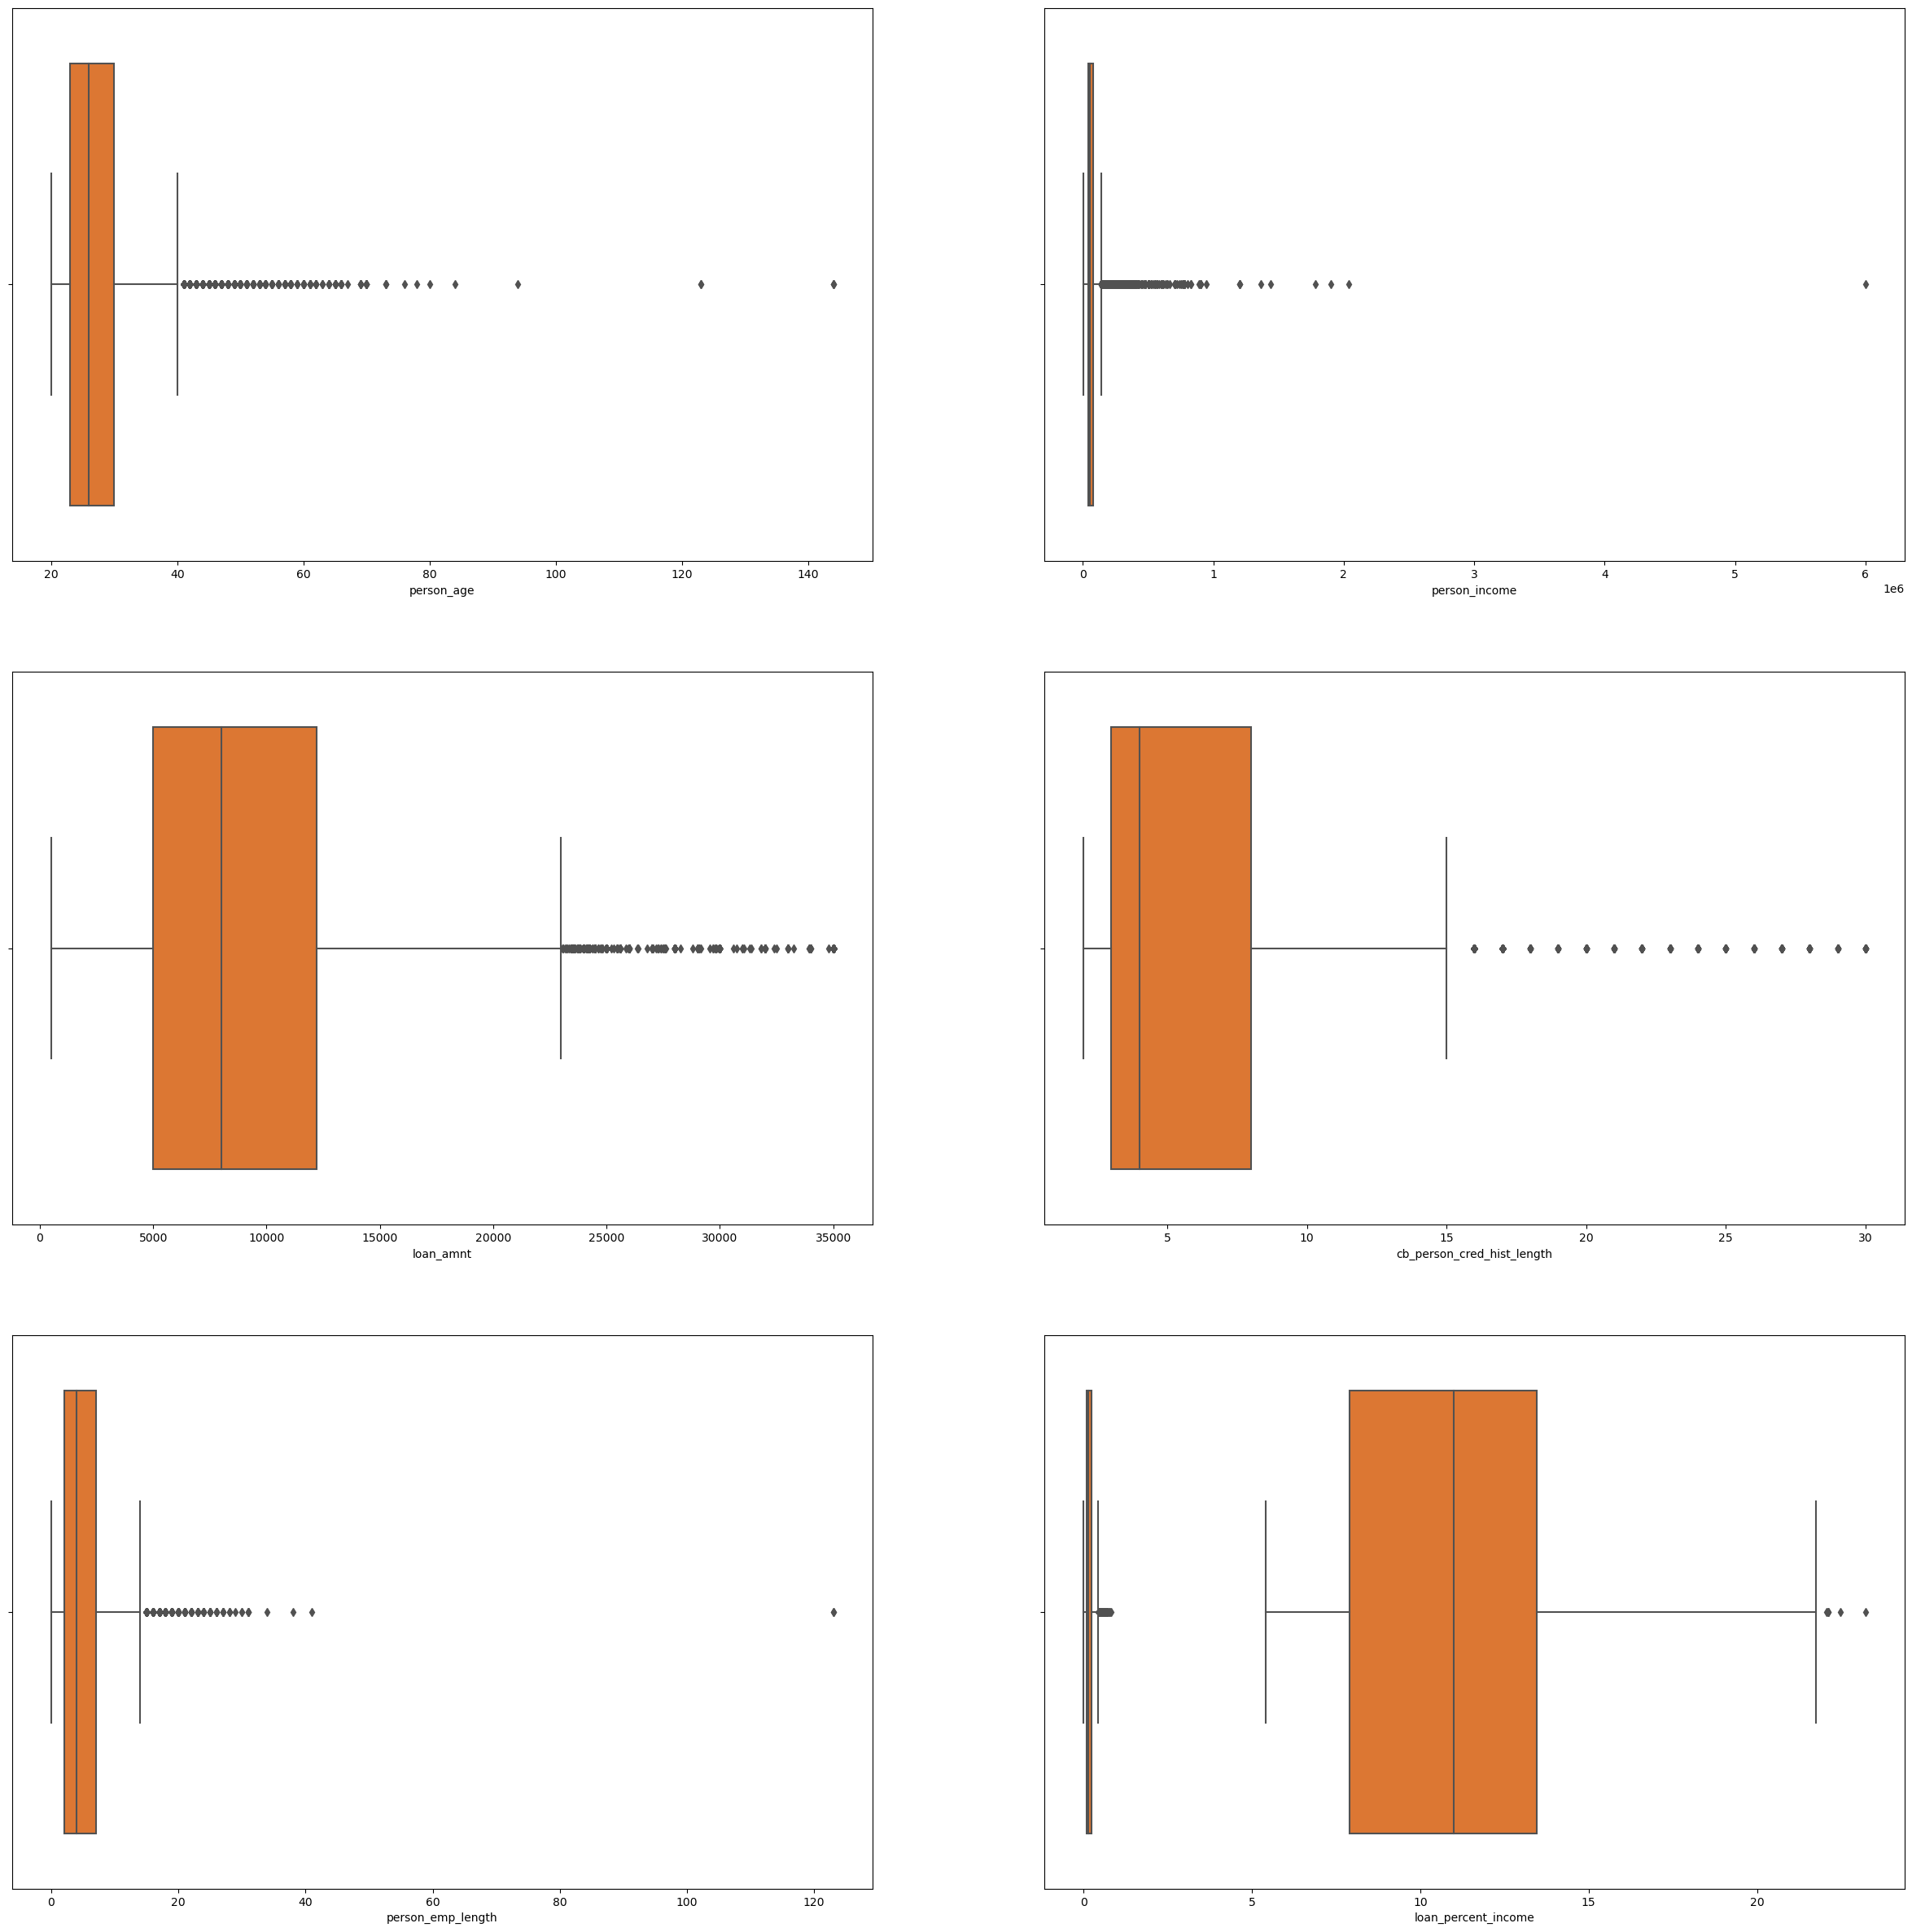

In [13]:
# Check outlier value
color = '#F87217'
fig,axes = plt.subplots(3, 2, figsize=(30, 30))
sns.boxplot(x = "person_age", data = data, ax = axes[0,0], color=color)
sns.boxplot(x = "person_income", data = data, ax = axes[0,1], color=color)
sns.boxplot(x = "loan_amnt", data = data, ax = axes[1,0], color=color)
sns.boxplot(x = "cb_person_cred_hist_length", data = data, ax = axes[1,1], color=color)
sns.boxplot(x = "person_emp_length", data = data, ax = axes[2,0], color=color)
sns.boxplot(x = "loan_int_rate", data = data, ax = axes[2,1], color=color)
sns.boxplot(x = "loan_percent_income", data = data, ax = axes[2,1], color=color)
plt.show();

### 2.3 Data Visualization <a class="anchor" id="2.3"></a>

### 2.3.1 Target Variable <a class="anchor" id="2.3.1"></a>

In [14]:
data["loan_status"].describe()

count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

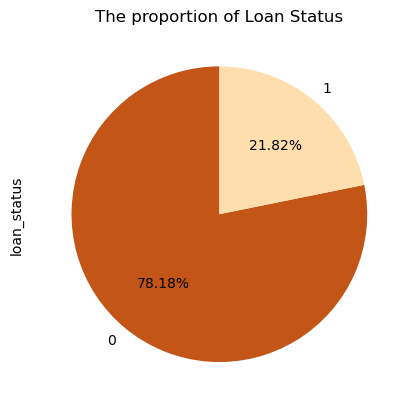

0    25473
1     7108
Name: loan_status, dtype: int64


In [15]:
plt.title('The proportion of Loan Status')
data['loan_status'].value_counts().plot(kind='pie', autopct="%.2f%%", 
                                        startangle = 90, colors = ['#C35617', '#FFDEAD'])
plt.show();
print(data.loan_status.value_counts())

**Nhận xét:** Từ biểu đồ trên, ta thấy Target `loan_status` có:
+ **21.82%** thuộc 1 (vỡ nợ hay **Default**).
+ **78.18%** thuộc 0 (không vỡ nợ hay **Not Default**).

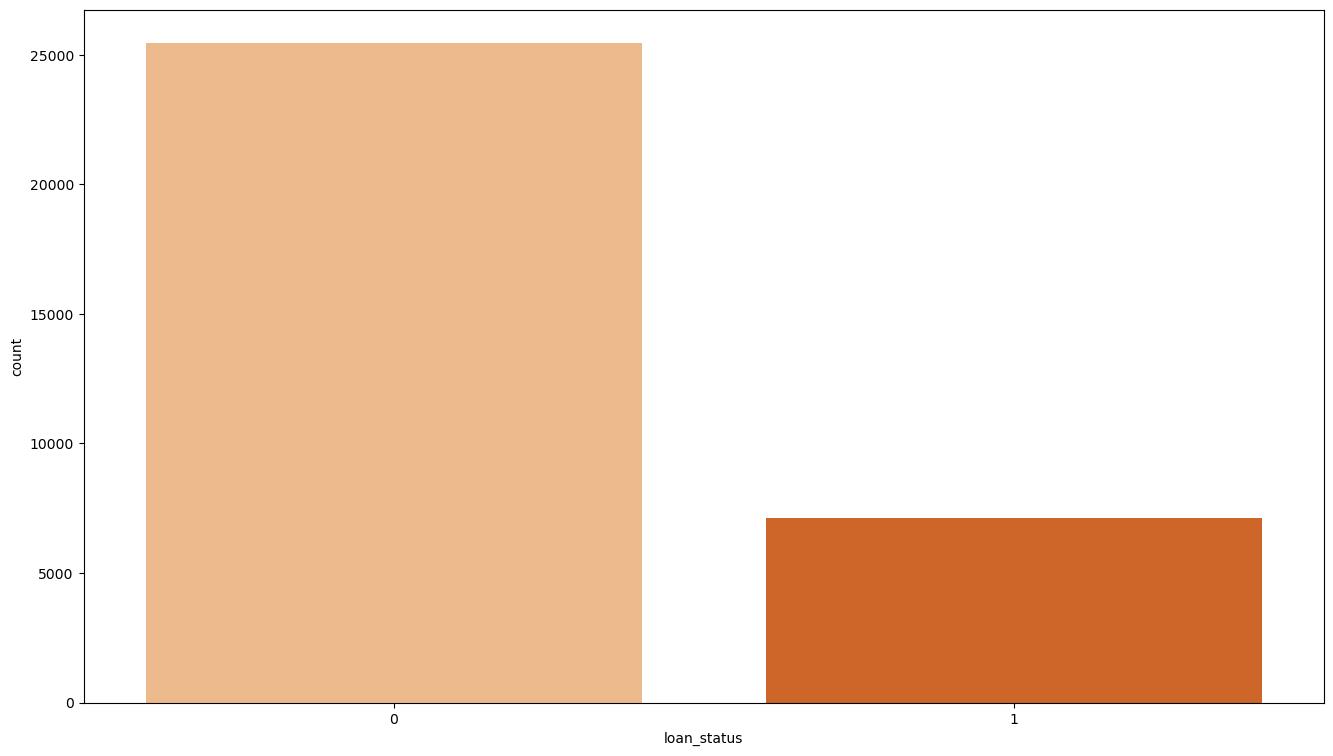

0    25473
1     7108
Name: loan_status, dtype: int64


In [16]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'loan_status', data = data, palette = 'Oranges')
plt.show();

print(data['loan_status'].value_counts())

**Nhận xét:** Data thuộc loại **Imbalance**.

Tiếp theo, dựa trên loại dữ liệu, ta tiến hành phân tích các biến cùng loại dữ liệu.

**Types of Data** gồm có 2 loại là:
+ Quantitive variable.
+ Categorical variable.

### 2.3.2 Quantitive Variables <a class="anchor" id="2.3.2"></a>
### Descriptive Summaries of Quantitive Variable

**Import libraries for Statistics**

In [17]:
# Import libraries for statistics
from scipy.stats import skew
from scipy.stats import kurtosis
import scipy.stats as stats
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic

In [18]:
corr_matrix = data.corr(method = "pearson" )
corr_matrix.style.background_gradient(cmap='Oranges')

In [19]:
df_num = data.select_dtypes(include='number')
df_cat = data.select_dtypes(include=['object','category'])

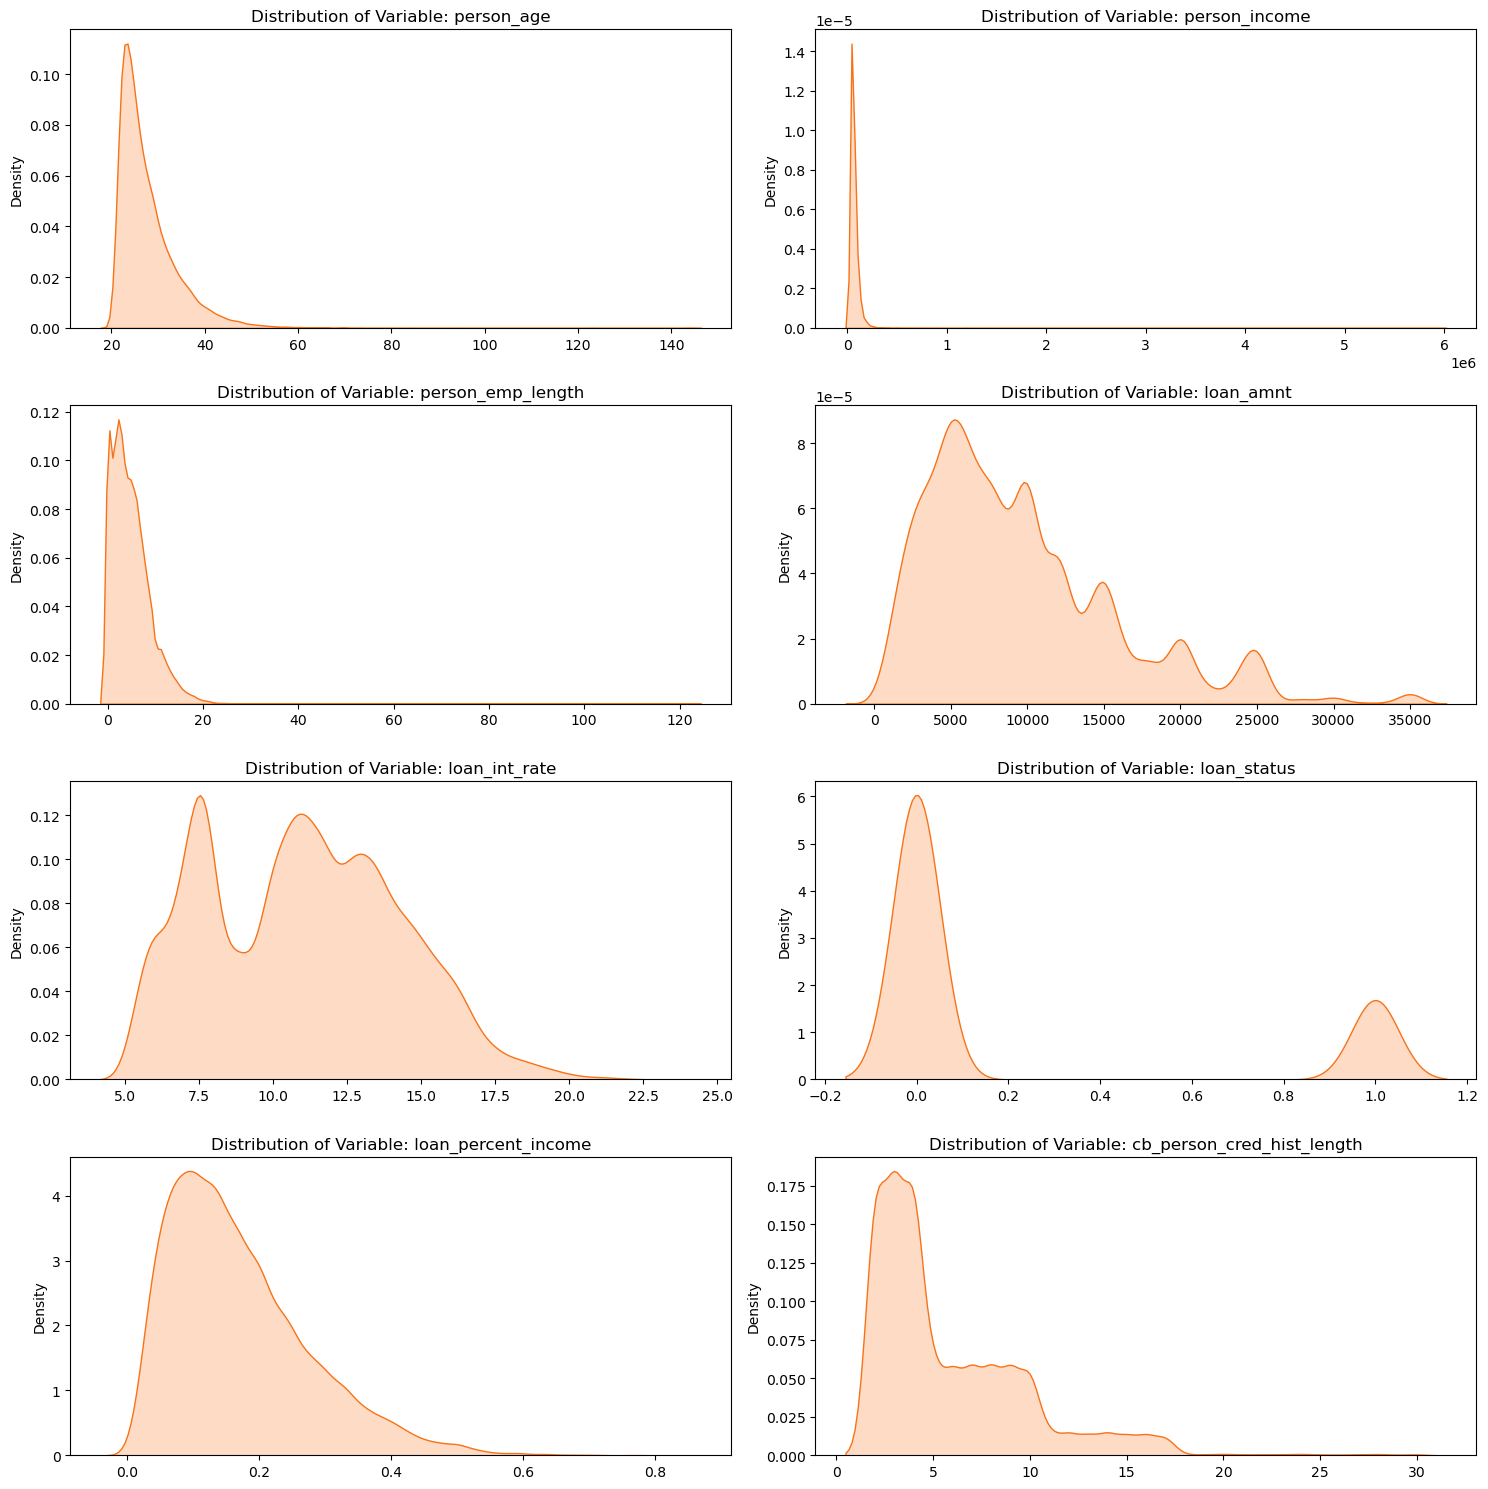

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15), sharex = False, sharey = False)
axes = axes.ravel()  
cols = df_num.columns[:]

for col, ax in zip(cols, axes):
    df = df_num 
    sns.kdeplot(data=df, x=col, shade=True, ax=ax, color='#F87217')
    ax.set(title=f'Distribution of Variable: {col}', xlabel=None)
    
fig.tight_layout()
plt.show();

**Nhận xét:** Hình dạng của phân phối: Biểu đồ cho tập dữ liệu mô tả phân phối dữ liệu, nghĩa là các giá trị mà biến nhận và tần suất xuất hiện của từng giá trị. Các bản phân phối có thể có một hoặc nhiều gò. Nếu phân phối có nhiều hơn một gò, thì đó không phải là phân phối đơn hình. Ví dụ: một số phân phối có hai gò, đây được gọi là phân phối lưỡng cực. Hình dạng của phân phối có thể đối xứng hoặc lệch.

**Examining each variable**

In [21]:
# creating seperate lists for categorical and numerical variables
numerical = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical = ['person_home_ownership', 'loan_intent','loan_grade','loan_status','cb_person_default_on_file']

In [22]:
def descriptive_summary_n(column):
    fig, axs = plt.subplots(1,2, figsize=(19,6))
    # creating histogram plot
    axs[0].hist(data[column], color='#FFEBCD') 
    # vertical line for mean of the distribution
    axs[0].axvline(data[column].mean(), color='red', label=f"Mean: {round(data[column].mean(),2)}")
    # vertical line for median of the distribution
    axs[0].axvline(data[column].median(), color='green', label=f"Median: {round(data[column].median(),2)}") 
    #vertical line for 25th percentile of the distribution
    axs[0].axvline(x=data[column].describe()[4],color='r', linestyle='--', label=f"25th percentile: {data[column].describe()[4]}")
    #vertical line for 75th percentile of the distribution
    axs[0].axvline(x=data[column].describe()[6],color='r', linestyle='--', label=f"75th percentile: {data[column].describe()[6]}") 
    axs[0].legend()
    sns.boxplot(data=data, x=column, ax=axs[1], color='#FFEBCD') # creating boxplot
    axs[1].axvline(data[column].mean(), color='red') # vertical line for the mean of the distribution
    fig.suptitle(f"Histogram and Boxplot of {column}")
    plt.show()
    print(f"{data[column].describe().round(3)}\n")
    print(f"Range: {data[column].max() - data[column].min()}")
    print(f"Interquartile Range: {data[column].describe()[6] - data[column].describe()[4]}\n")
    print(f"Skewness: {skew(data[data[column].isna()==False][column], bias=True)}")
    print(f"Kurtosis: {kurtosis(data[data[column].isna()==False][column], bias=True)}")

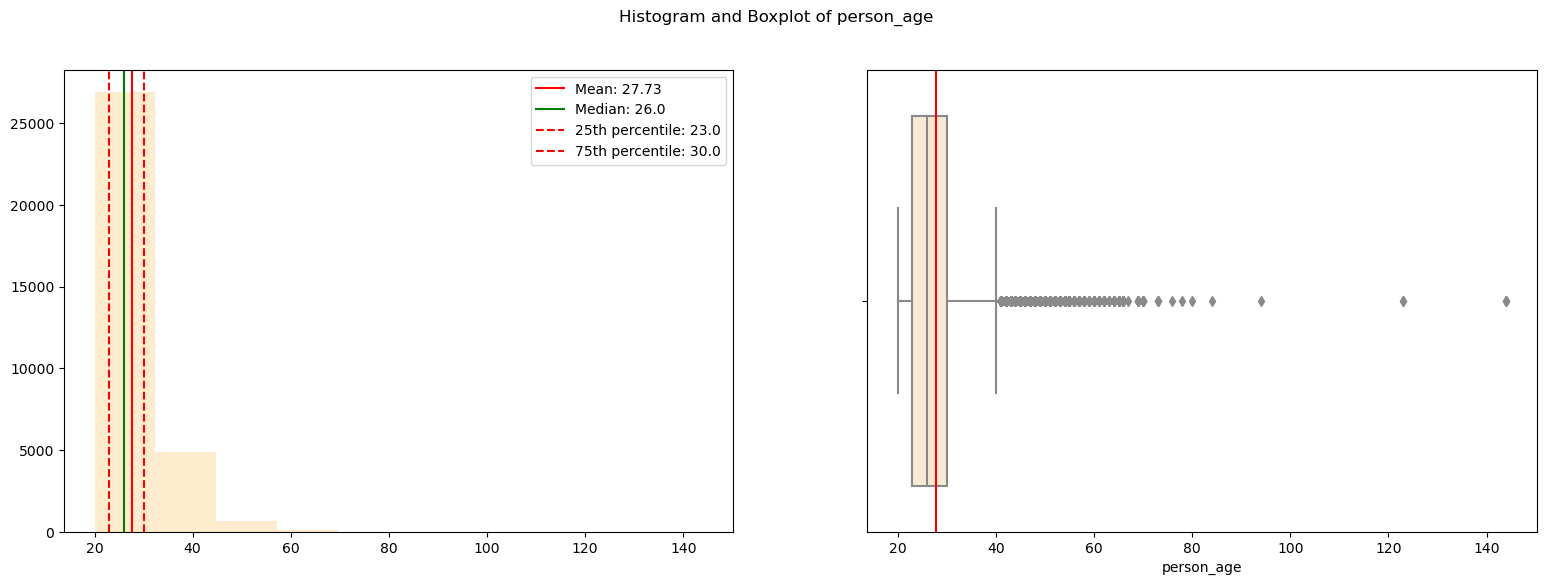

count    32581.000
mean        27.735
std          6.348
min         20.000
25%         23.000
50%         26.000
75%         30.000
max        144.000
Name: person_age, dtype: float64

Range: 124
Interquartile Range: 7.0

Skewness: 2.5812736796698657
Kurtosis: 18.557792324565625


In [23]:
descriptive_summary_n(numerical[0])

**Nhận xét:**
+ `Range` so với `Interquartile Range` là rất lớn. Dữ liệu chủ yếu được phân phối trong khoảng từ 23 đến 30 và nó bị lệch phải. Độ lệch được sử dụng để đo mức độ lệch của dữ liệu. Nếu độ lệch bằng 0 có nghĩa là không lệch. Tuy nhiên, nếu nó dương thì có nghĩa là nó bị lệch phải. Trong trường hợp biến `person_age` là 2,58. `Kurtosis` được sử dụng để đo lường cách dữ liệu được theo đuôi so với phân phối bình thường. Nếu nó bằng 3 có nghĩa là nó rất gần với phân phối chuẩn. Nếu nó lớn hơn 3, điều đó có nghĩa là nó có đuôi rất dài và có nhiều giá trị ngoại lệ. Độ nhọn của biến `person_ income` là 18,56, lớn hơn 3. Dữ liệu có đuôi dài và có khả năng có giá trị ngoại lệ.

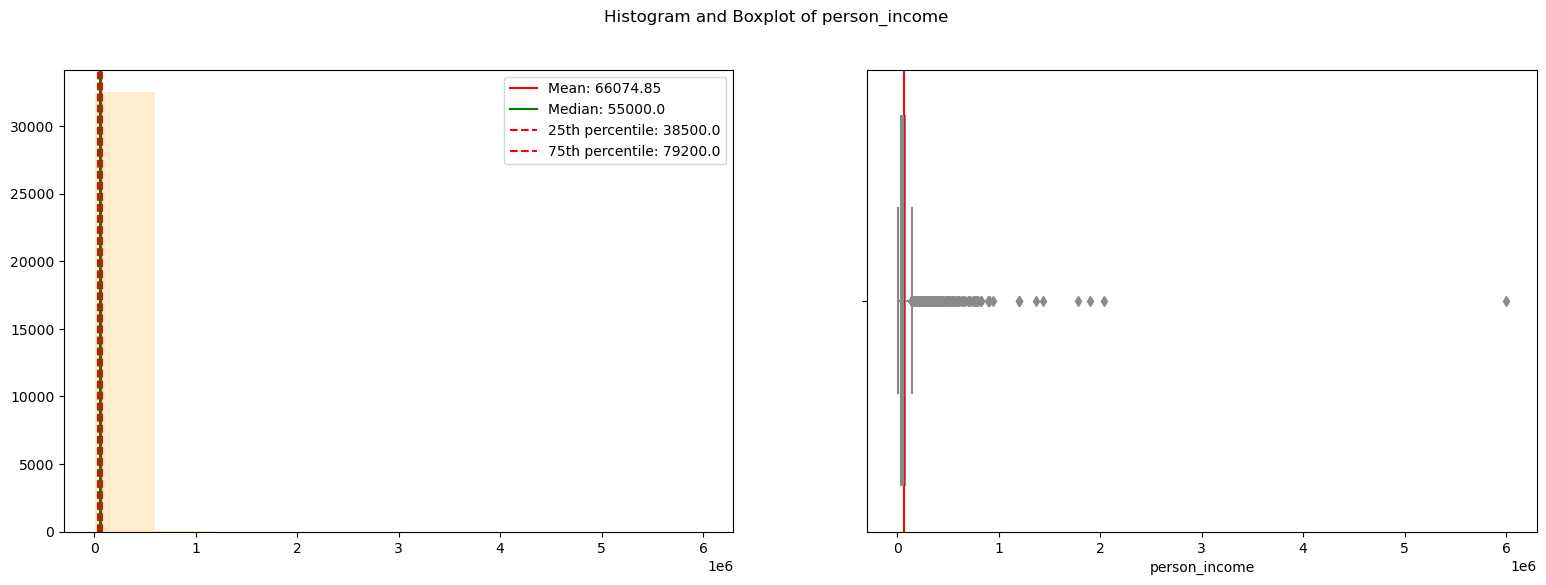

count      32581.000
mean       66074.848
std        61983.119
min         4000.000
25%        38500.000
50%        55000.000
75%        79200.000
max      6000000.000
Name: person_income, dtype: float64

Range: 5996000
Interquartile Range: 40700.0

Skewness: 32.86383572338852
Kurtosis: 2692.8592897449143


In [24]:
descriptive_summary_n(numerical[1])

**Nhận xét:** 
+ Biến `person_ income` bị lệch phải rất nhiều, có đuôi rất dài và có nhiều giá trị ngoại lai. Độ lệch chuẩn của dữ liệu là 61983,12 có nghĩa là có sự khác biệt lớn trong dữ liệu. Nhưng dữ liệu chủ yếu được phân phối giữa 38500 và 79200.

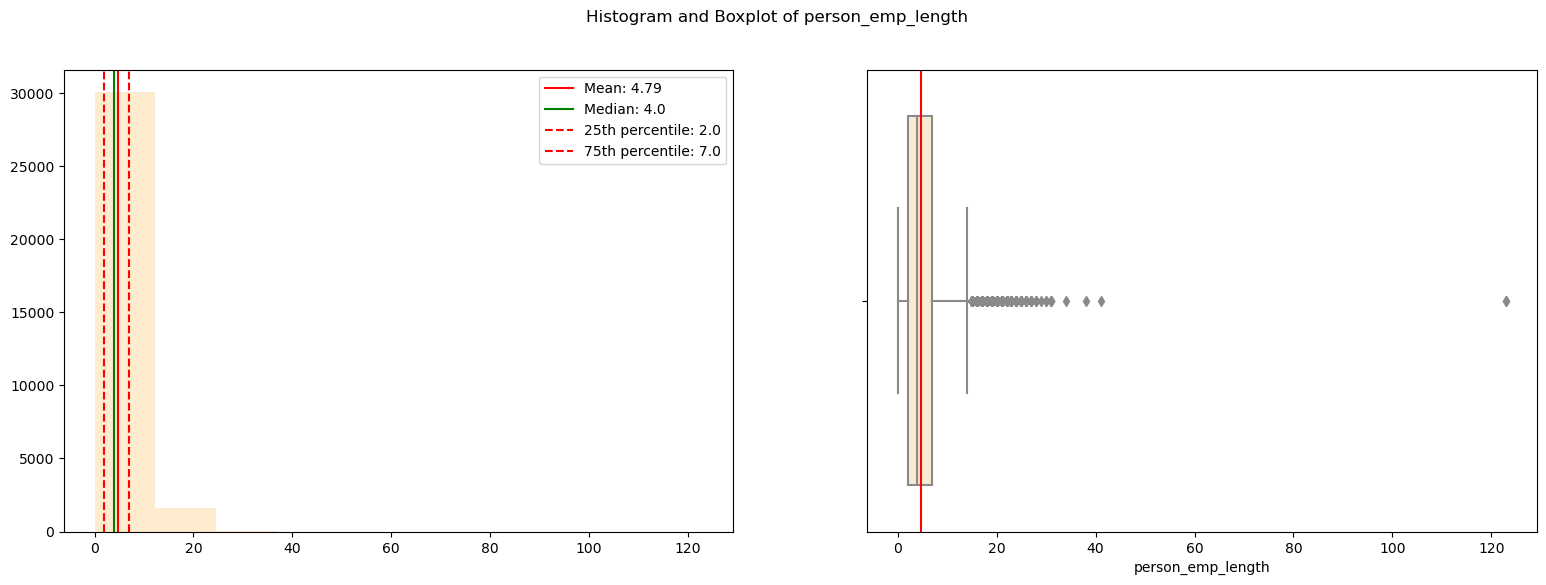

count    31686.000
mean         4.790
std          4.143
min          0.000
25%          2.000
50%          4.000
75%          7.000
max        123.000
Name: person_emp_length, dtype: float64

Range: 123.0
Interquartile Range: 5.0

Skewness: 2.6143313527840095
Kurtosis: 43.71524985460213


In [25]:
descriptive_summary_n(numerical[2])

**Nhận xét:**
+ `person_emp_length` bị lệch phải và có đuôi dài với các ngoại lệ tiềm năng. Nó chủ yếu được phân phối từ 2 đến 7. Số tối đa là 123, 123 năm làm việc có thể không đúng, quan sát này có khả năng là một lỗi.

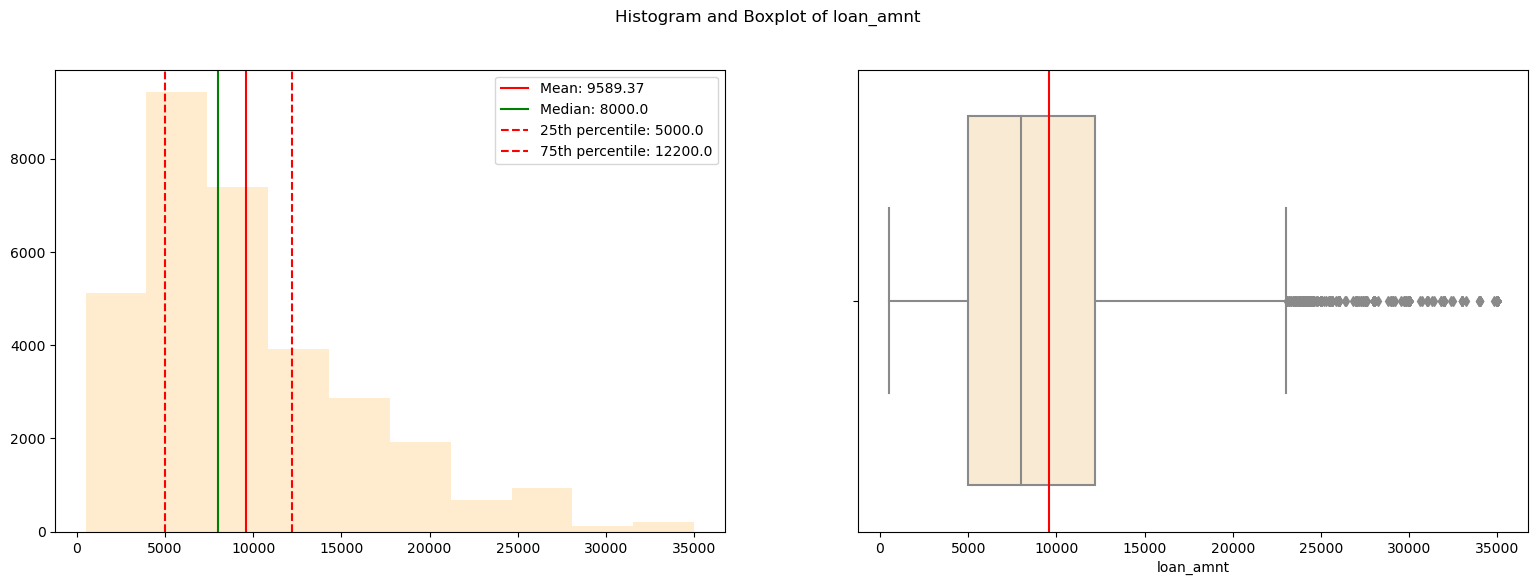

count    32581.000
mean      9589.371
std       6322.087
min        500.000
25%       5000.000
50%       8000.000
75%      12200.000
max      35000.000
Name: loan_amnt, dtype: float64

Range: 34500
Interquartile Range: 7200.0

Skewness: 1.192422526473502
Kurtosis: 1.4231627003417104


In [26]:
descriptive_summary_n(numerical[3])

**Nhận xét:**
+ Biến `loan_amnt` hơi lệch phải. Độ nhọn `Skewness` bằng 1,42 do đó phân phối lệch phải.

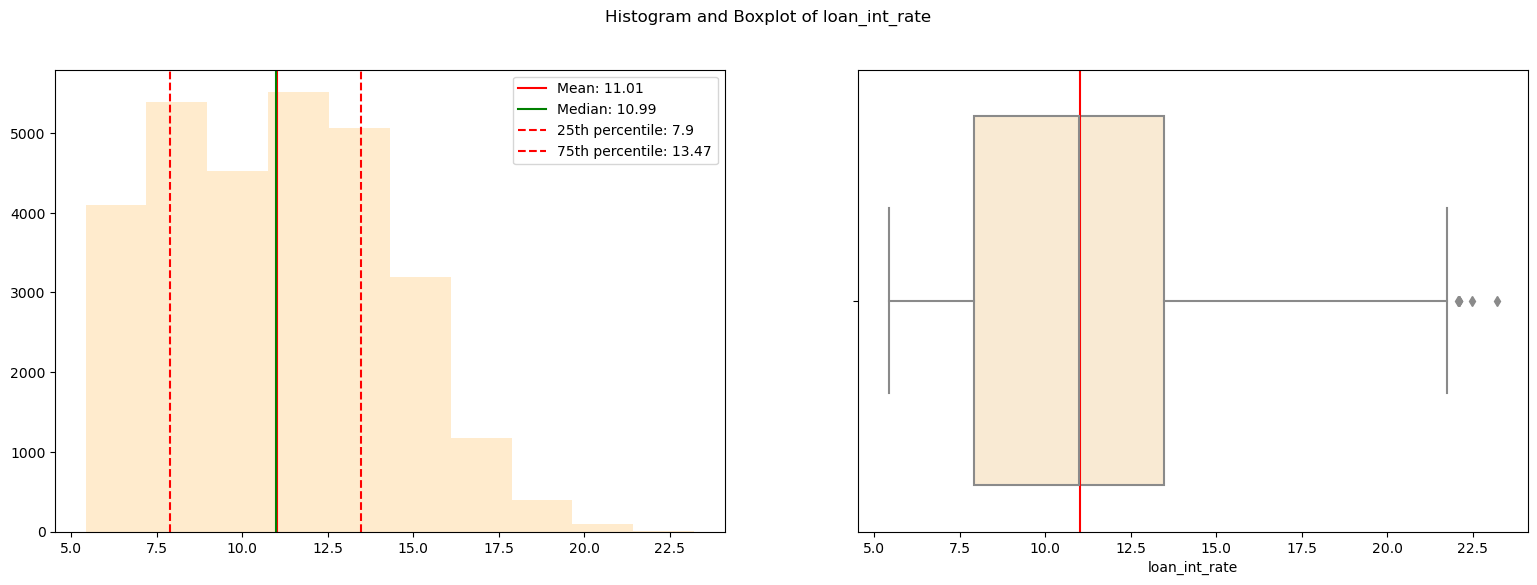

count    29465.000
mean        11.012
std          3.240
min          5.420
25%          7.900
50%         10.990
75%         13.470
max         23.220
Name: loan_int_rate, dtype: float64

Range: 17.799999999999997
Interquartile Range: 5.57

Skewness: 0.2085396846918691
Kurtosis: -0.6716987706450692


In [27]:
descriptive_summary_n(numerical[4])

**Nhận xét:**
+ Độ lệch của biến `loan_int_rate` là 0,20 rất gần với phân phối chuẩn. Dữ liệu có đuôi nhẹ hơn so với phân phối bình thường. Mean và Median rất gần nhau.

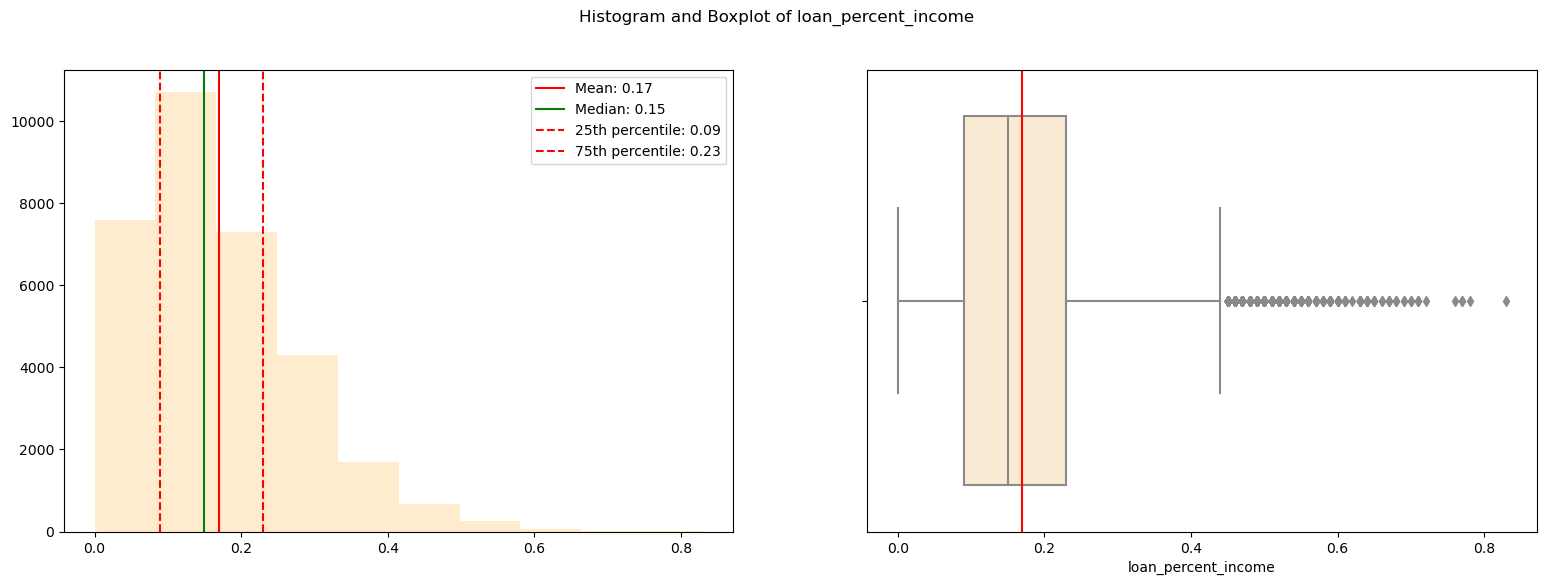

count    32581.000
mean         0.170
std          0.107
min          0.000
25%          0.090
50%          0.150
75%          0.230
max          0.830
Name: loan_percent_income, dtype: float64

Range: 0.83
Interquartile Range: 0.14

Skewness: 1.0646196197529139
Kurtosis: 1.2233147441419057


In [28]:
descriptive_summary_n(numerical[5])

**Nhận xét:**
+ Biến `loan_percent_ income` bị lệch phải và hơi nghiêng.

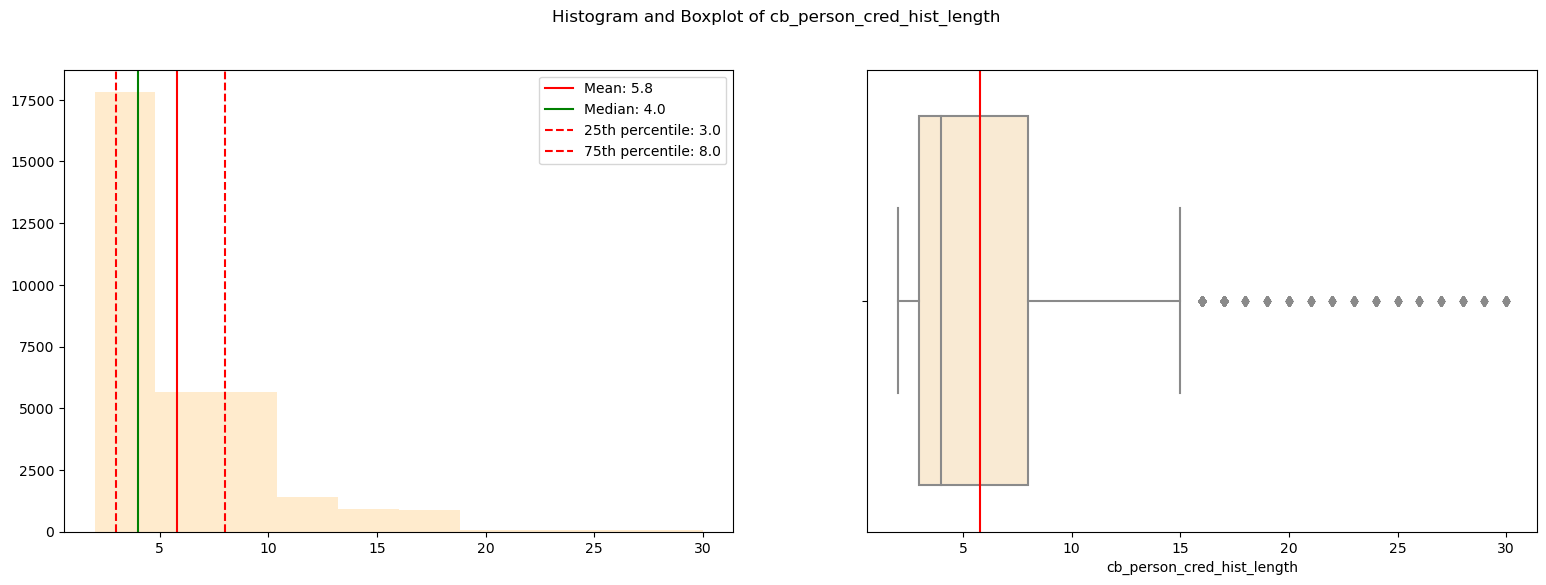

count    32581.000
mean         5.804
std          4.055
min          2.000
25%          3.000
50%          4.000
75%          8.000
max         30.000
Name: cb_person_cred_hist_length, dtype: float64

Range: 28
Interquartile Range: 5.0

Skewness: 1.6617136116084419
Kurtosis: 3.715439392280821


In [29]:
descriptive_summary_n(numerical[6])

**Nhận xét:**
+ Biến `cb_person_cred_hist_length` hơi lệch phải. Độ nhọn bằng 3,7 rất gần với đỉnh phân phối chuẩn. Chủ yếu được phân phối giữa 3 và 8.

### 2.3.3 Categorical Variables <a class="anchor" id="2.3.3"></a>

### Descriptive Summaries of Categorical Data

In [30]:
# Để dễ đọc hơn, tạo bản sao dữ liệu và 
# thay đổi 0 và 1 thành Not Default và Default trong loan_status (đổi từ numerical sang categorical)
data0 = data.copy()
data0.loc[data0['loan_status']==0, 'loan_status']='Not Default'
data0.loc[data0['loan_status']==1, 'loan_status']='Default'

In [31]:
data0.describe(include = "O").T

count unique          top   freq
person_home_ownership      32581      4         RENT  16446
loan_intent                32581      6    EDUCATION   6453
loan_grade                 32581      7            A  10777
loan_status                32581      2  Not Default  25473
cb_person_default_on_file  32581      2            N  26836

In [32]:
cat_col = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
data0[cat_col].mode().T

0
person_home_ownership           RENT
loan_intent                EDUCATION
loan_grade                         A
cb_person_default_on_file          N

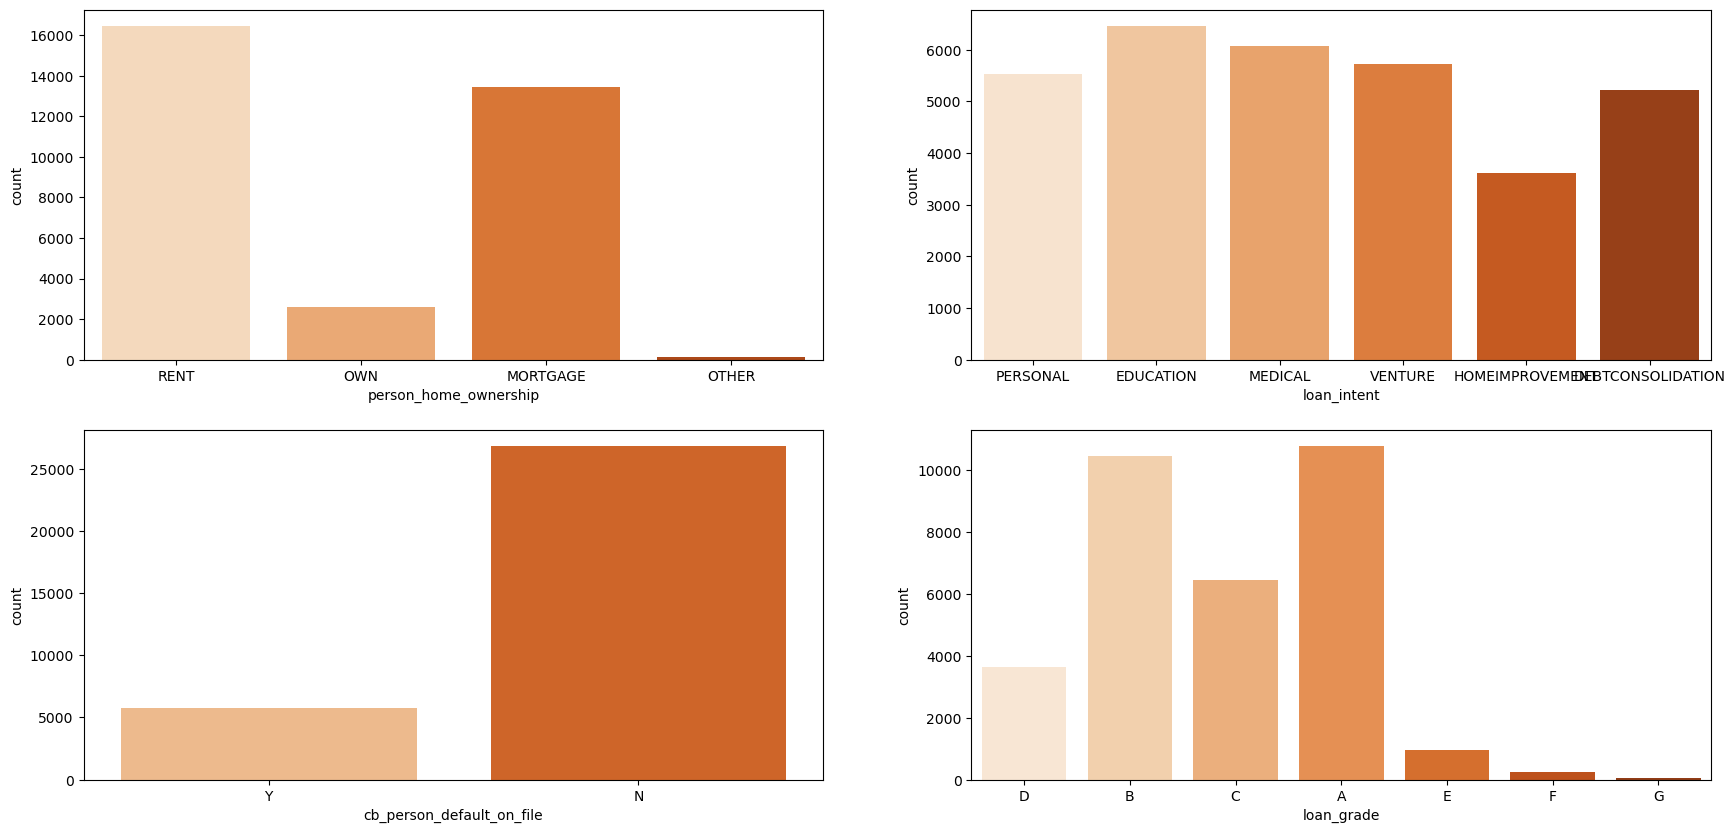

In [33]:
fig,axes = plt.subplots(2,2, figsize=(21,10))

sns.countplot(x = data['person_home_ownership'], data=data, ax=axes[0,0], palette='Oranges')
sns.countplot(x = data['loan_intent'], data=data, ax=axes[0,1], palette='Oranges')
sns.countplot(x = data['loan_grade'], data=data, ax=axes[1,1], palette='Oranges')
sns.countplot(x = data['cb_person_default_on_file'], data=data, ax=axes[1,0], palette='Oranges');

In [34]:
def descriptive_summary_c(column):
    print(f"\033[1mFrequency table of {column} variable: \033[0m")
    #creating frequency table from counts of each category
    freq_table = data0[column].value_counts().to_frame().reset_index() 
    freq_table.columns = [column, 'Frequencies']
    #adding percentages
    freq_table['% Percentages'] = round(freq_table['Frequencies']/data0[column].count()*100,2) 
    display(freq_table)
    print()
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    # barplot to display frequencies
    sns.barplot(data=freq_table, x='Frequencies', y=column, palette='Oranges', ax=axs[0]) 
    colors = sns.color_palette('Oranges')
    d = list(freq_table['% Percentages'])
    labels = list(freq_table[column])
    # pie chart to show percentage distribution of each category
    plt.pie(d, labels = labels, colors = colors, autopct='%.0f%%') 
    fig.suptitle(f"Bar Chart and Pie Chart of {column} variable")
    plt.show();

Frequency table of person_home_ownership variable: 


person_home_ownership  Frequencies  % Percentages
0                  RENT        16446          50.48
1              MORTGAGE        13444          41.26
2                   OWN         2584           7.93
3                 OTHER          107           0.33

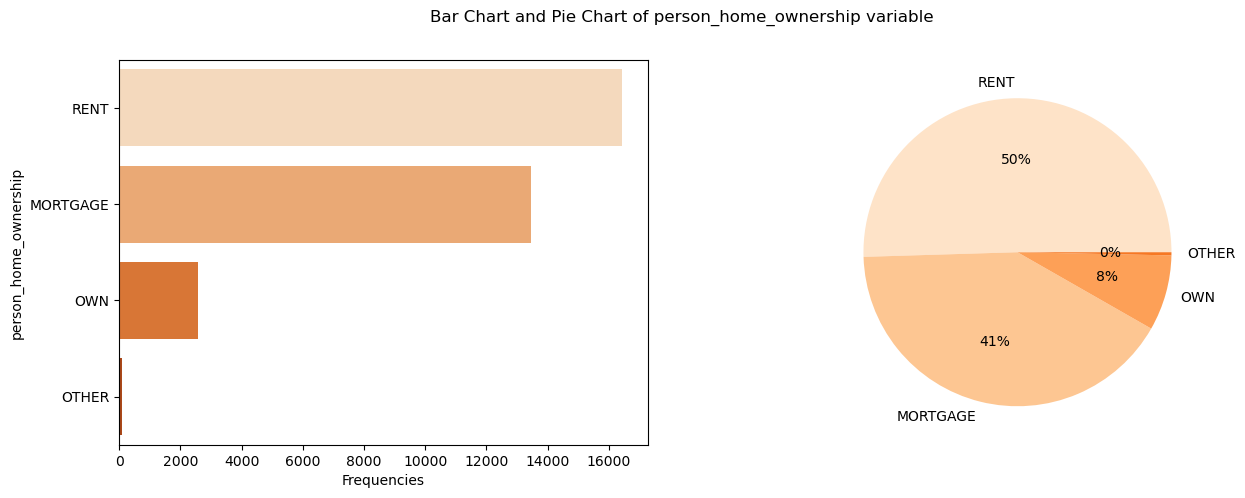

In [35]:
descriptive_summary_c(categorical[0])

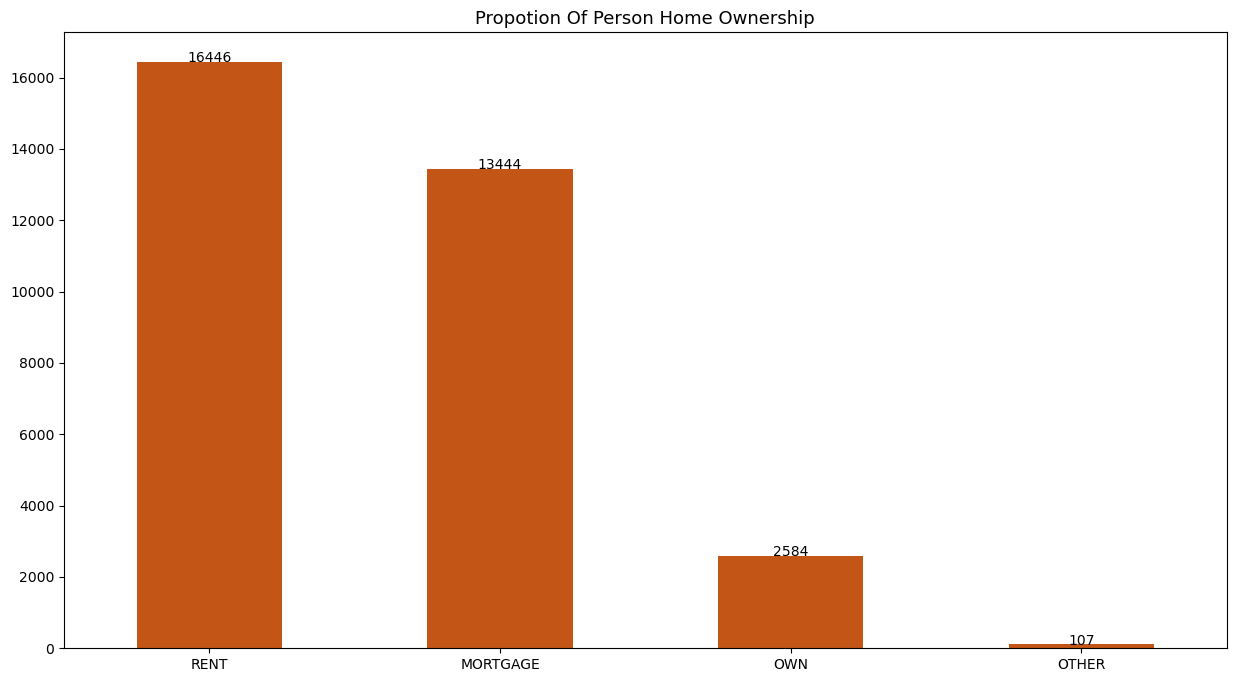

In [36]:
fig, ax1 = plt.subplots(figsize=(15, 8))
plt.title('Propotion Of Person Home Ownership', fontsize=13)
graph = data['person_home_ownership'].value_counts(ascending = False).plot(kind='bar', color="#C35617")
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1, height ,ha="center")

**Nhận xét:**
+ Tỷ lệ lớn của biến `person_home_ownership` là Tiền thuê nhà và Thế chấp (**Rent** and **Mortage**).

Frequency table of loan_intent variable: 


loan_intent  Frequencies  % Percentages
0          EDUCATION         6453          19.81
1            MEDICAL         6071          18.63
2            VENTURE         5719          17.55
3           PERSONAL         5521          16.95
4  DEBTCONSOLIDATION         5212          16.00
5    HOMEIMPROVEMENT         3605          11.06

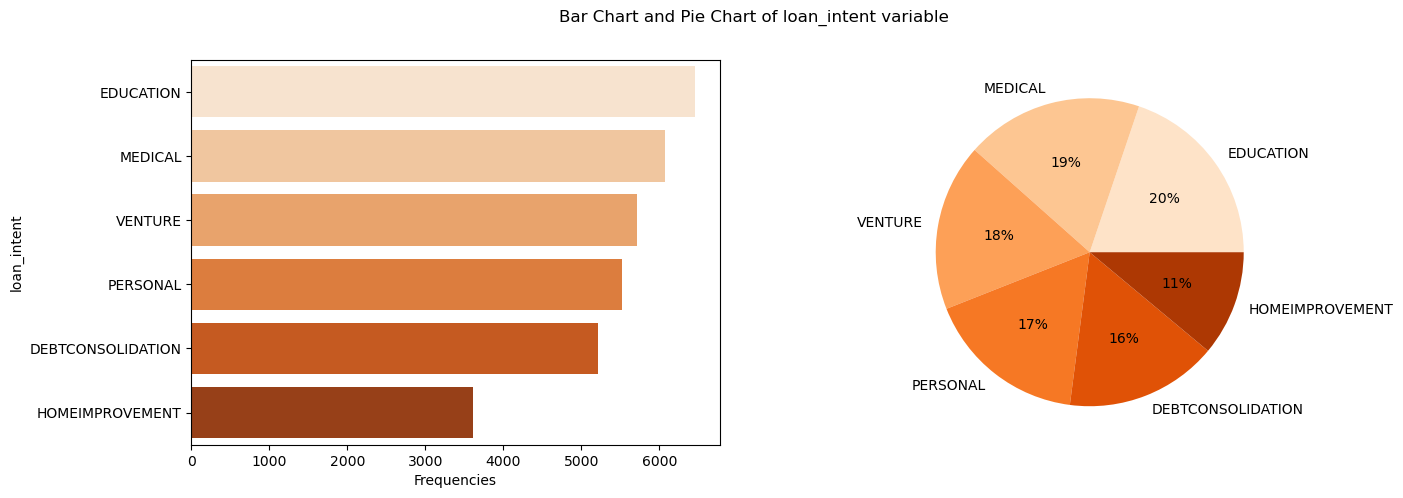

In [37]:
descriptive_summary_c(categorical[1])

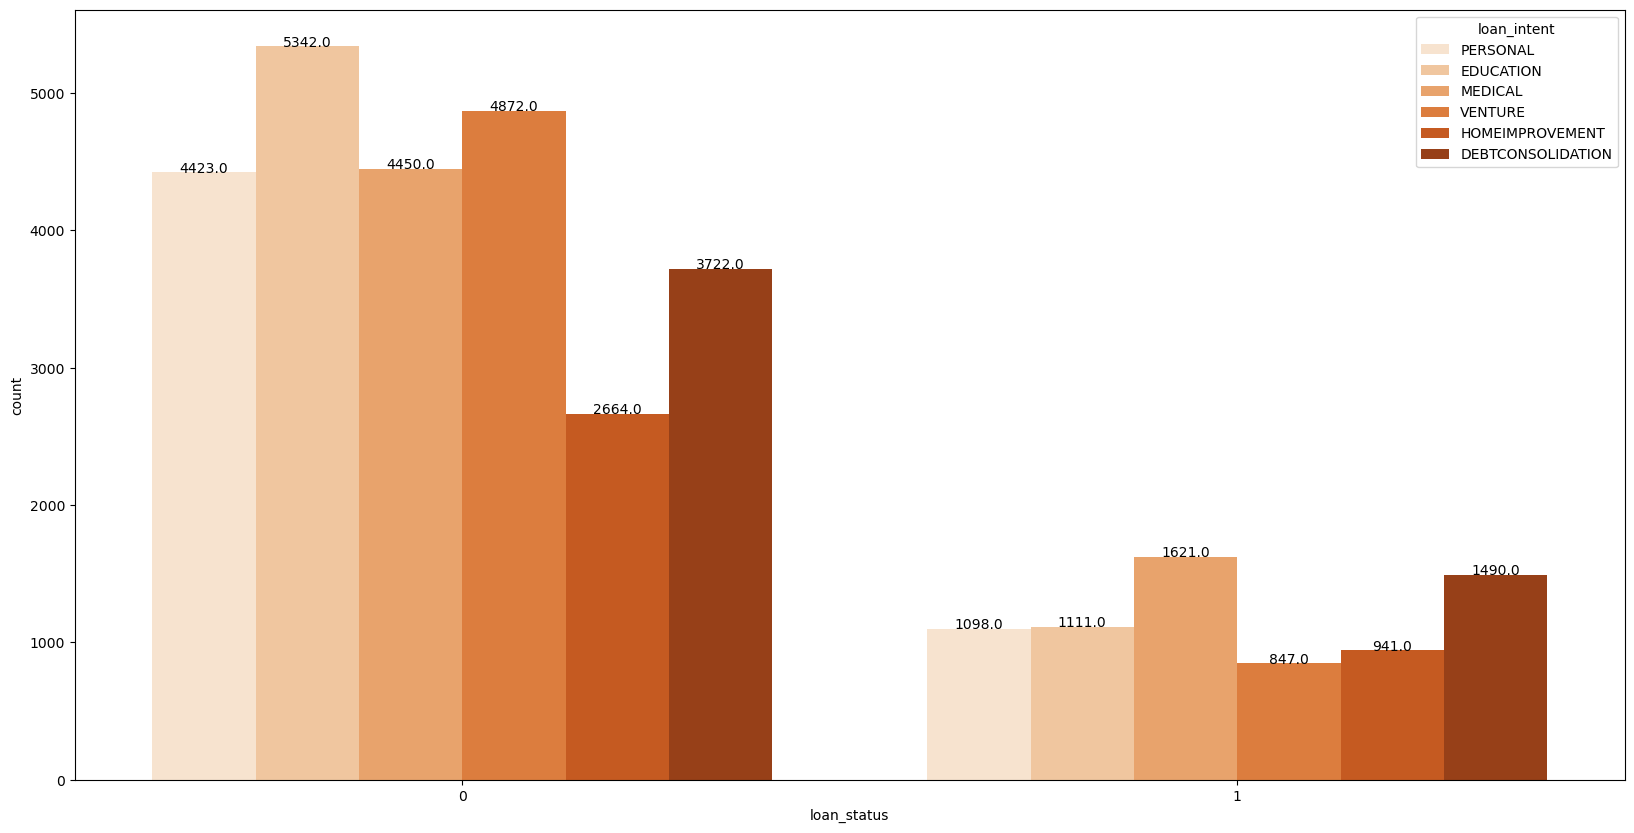

In [38]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1, x='loan_status', hue="loan_intent", data=data, palette="Oranges")
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.1, height, ha="center")

**Nhận xét:**
+ Ở đây dữ liệu được phân phối theo tỷ lệ xấp xỉ như nhau. Nhưng hầu hết được thực hiện cho mục đích giáo dục (**EDUCATION**).

Frequency table of loan_grade variable: 


loan_grade  Frequencies  % Percentages
0          A        10777          33.08
1          B        10451          32.08
2          C         6458          19.82
3          D         3626          11.13
4          E          964           2.96
5          F          241           0.74
6          G           64           0.20

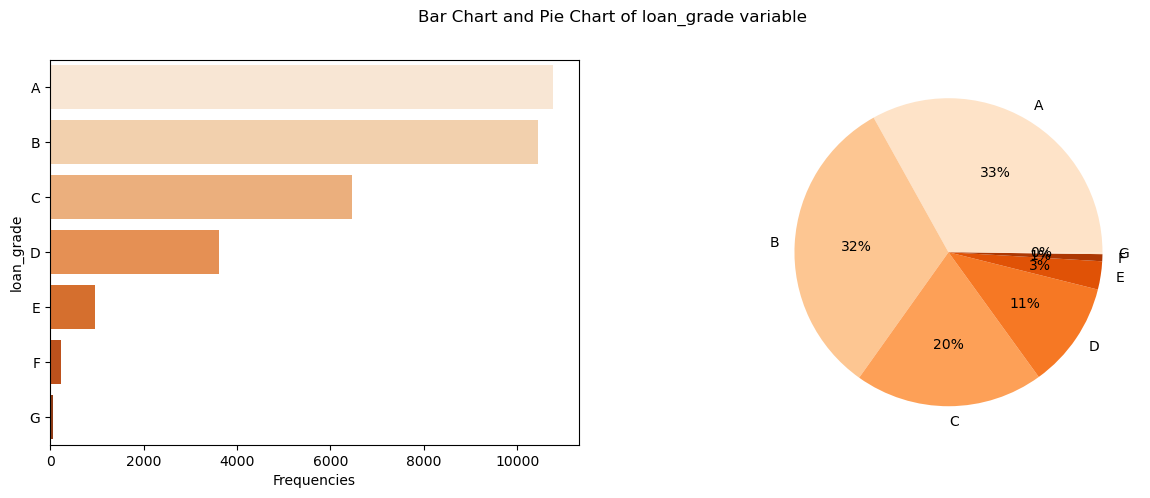

In [39]:
descriptive_summary_c(categorical[2])

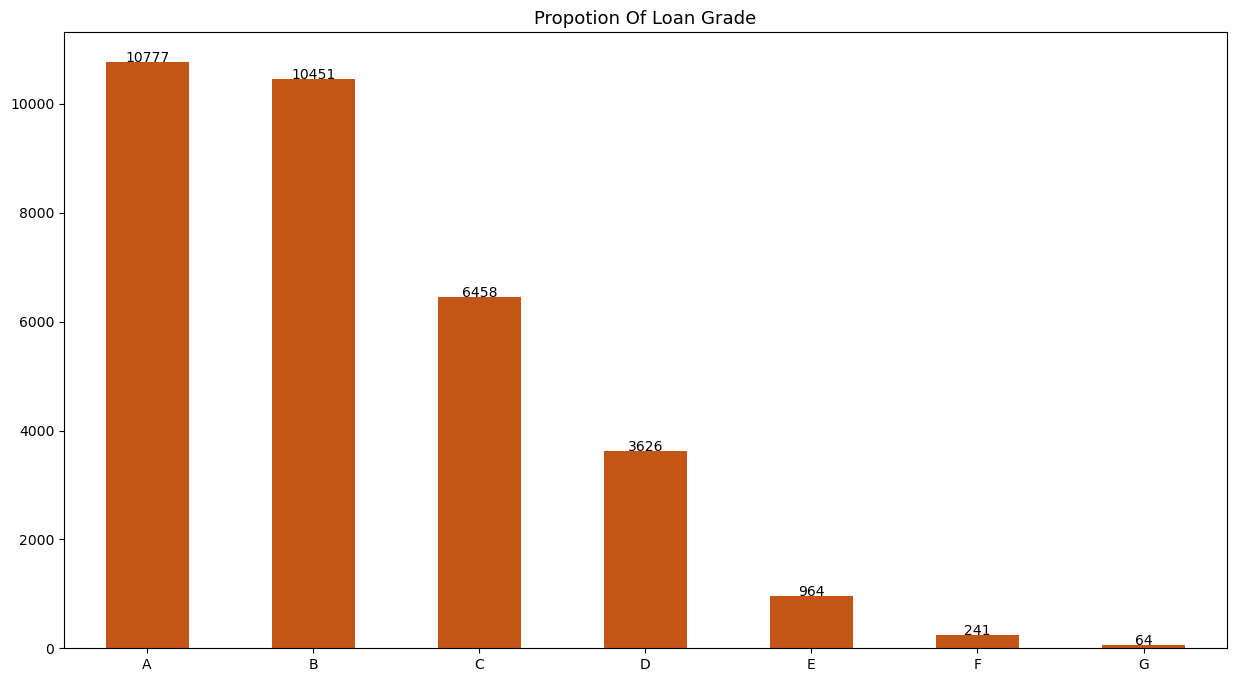

In [40]:
fig, ax1 = plt.subplots(figsize=(15, 8))
plt.title('Propotion Of Loan Grade', fontsize=13)
graph = data['loan_grade'].value_counts(ascending = False).plot(kind='bar', color="#C35617")
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1, height ,ha="center")

**Nhận xét:**
+ Hầu hết dữ liệu biến `loan_grade` được phân phối trong danh mục "A", "B", "C" và "D".

Frequency table of loan_status variable: 


loan_status  Frequencies  % Percentages
0  Not Default        25473          78.18
1      Default         7108          21.82

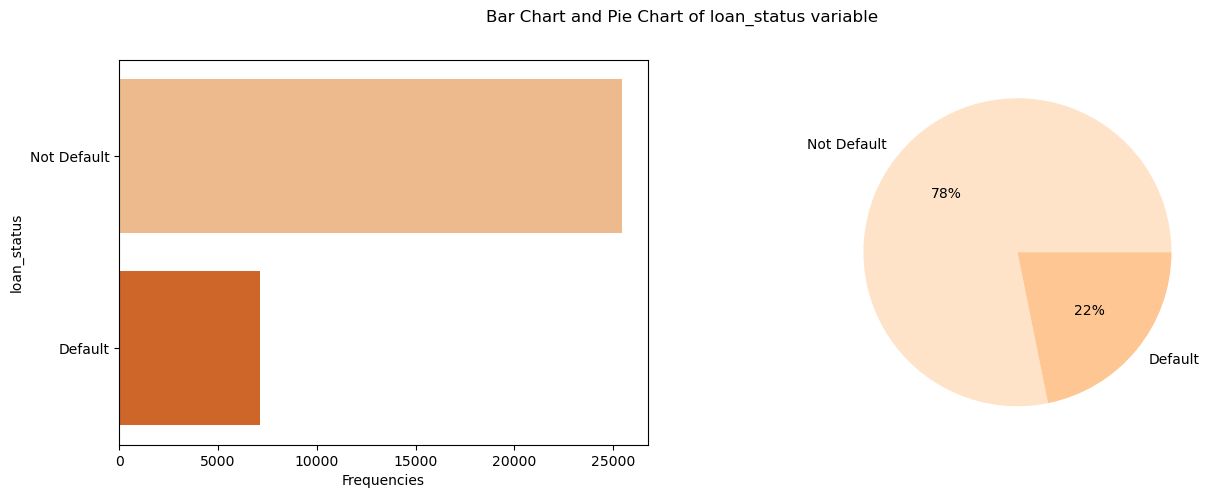

In [41]:
descriptive_summary_c(categorical[3])

**Nhận xét:**
+ Phần lớn biến `loan_status` nằm trong danh mục "Not Default".

Frequency table of cb_person_default_on_file variable: 


cb_person_default_on_file  Frequencies  % Percentages
0                         N        26836          82.37
1                         Y         5745          17.63

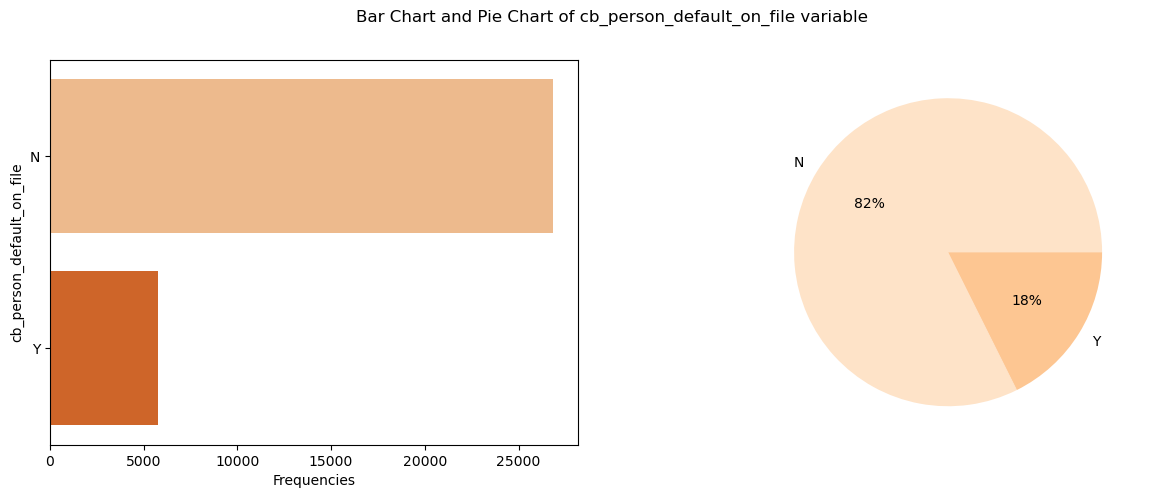

In [42]:
descriptive_summary_c(categorical[4])

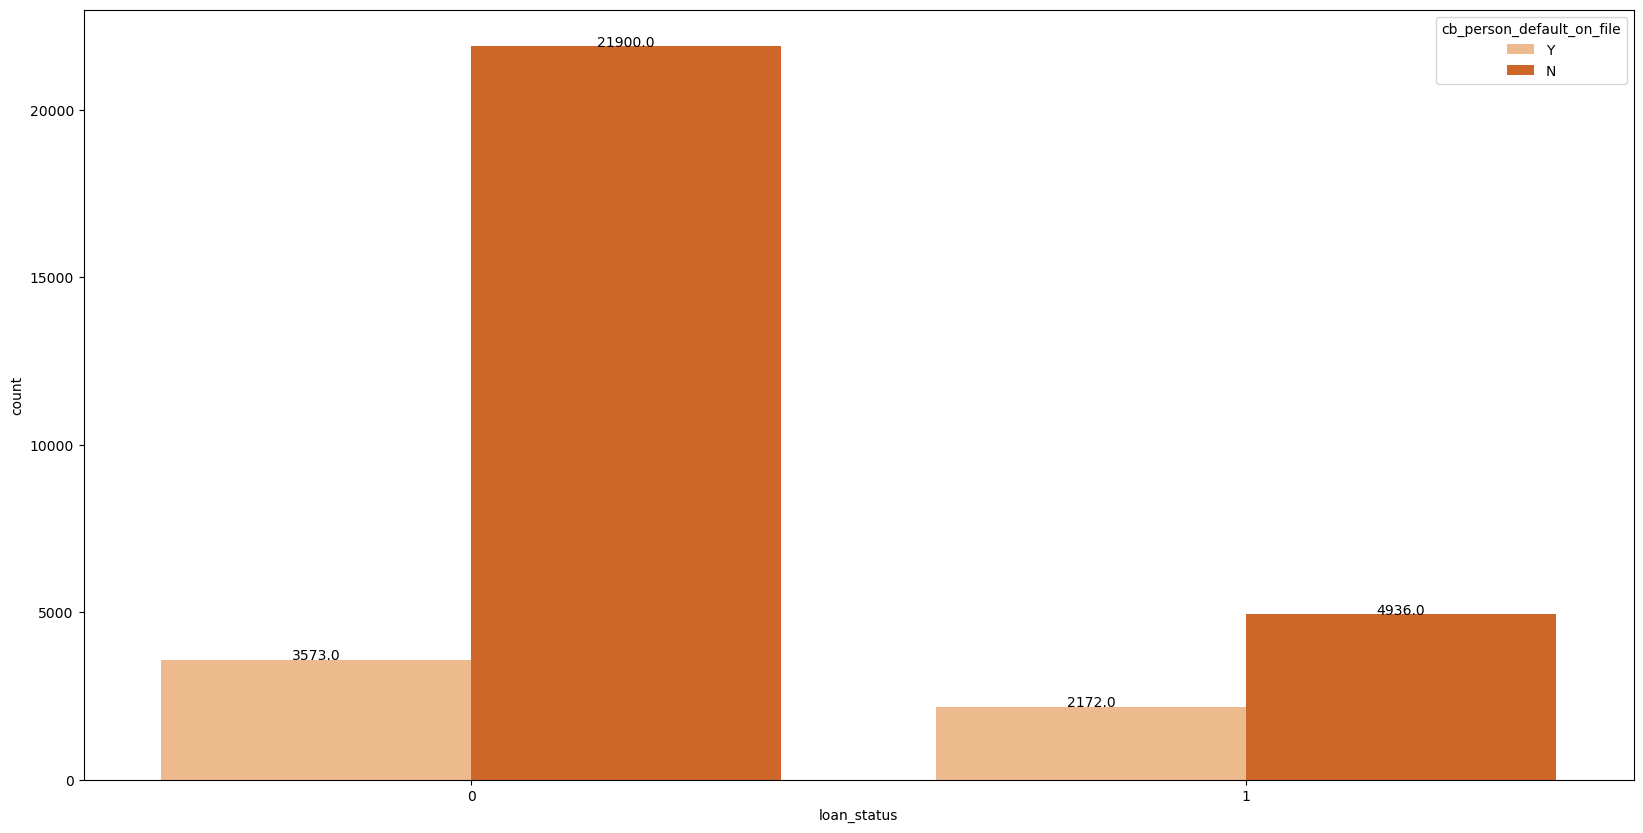

In [43]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1, x='loan_status', hue="cb_person_default_on_file", data=data, palette="Oranges" )
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

**Nhận xét:**
+ `cb_person_default_on_file` với 82% là "N".

### 2.3.4 Response Variable and Explanatory Variables <a class="anchor" id="2.3.4"></a>
Phân tích dữ liệu xem xét kết quả của biến phản hồi phụ thuộc vào hoặc được giải thích như thế nào bởi giá trị của biến giải thích. Trong project này, biến phản hồi sẽ là biến `loan_status`. Chúng ta sẽ xem xét các biến khác ảnh hưởng như thế nào đến biến `loan_status`.

**a) loan_status với quantitive variables**

Để kiểm tra biến `loan_status` và biến định lượng khác được liên kết với nhau như thế nào, chúng ta có thể xem dữ liệu thay đổi như thế nào khi trạng thái khoản vay là **Default** và khi trạng thái khoản vay là **Not Default**.

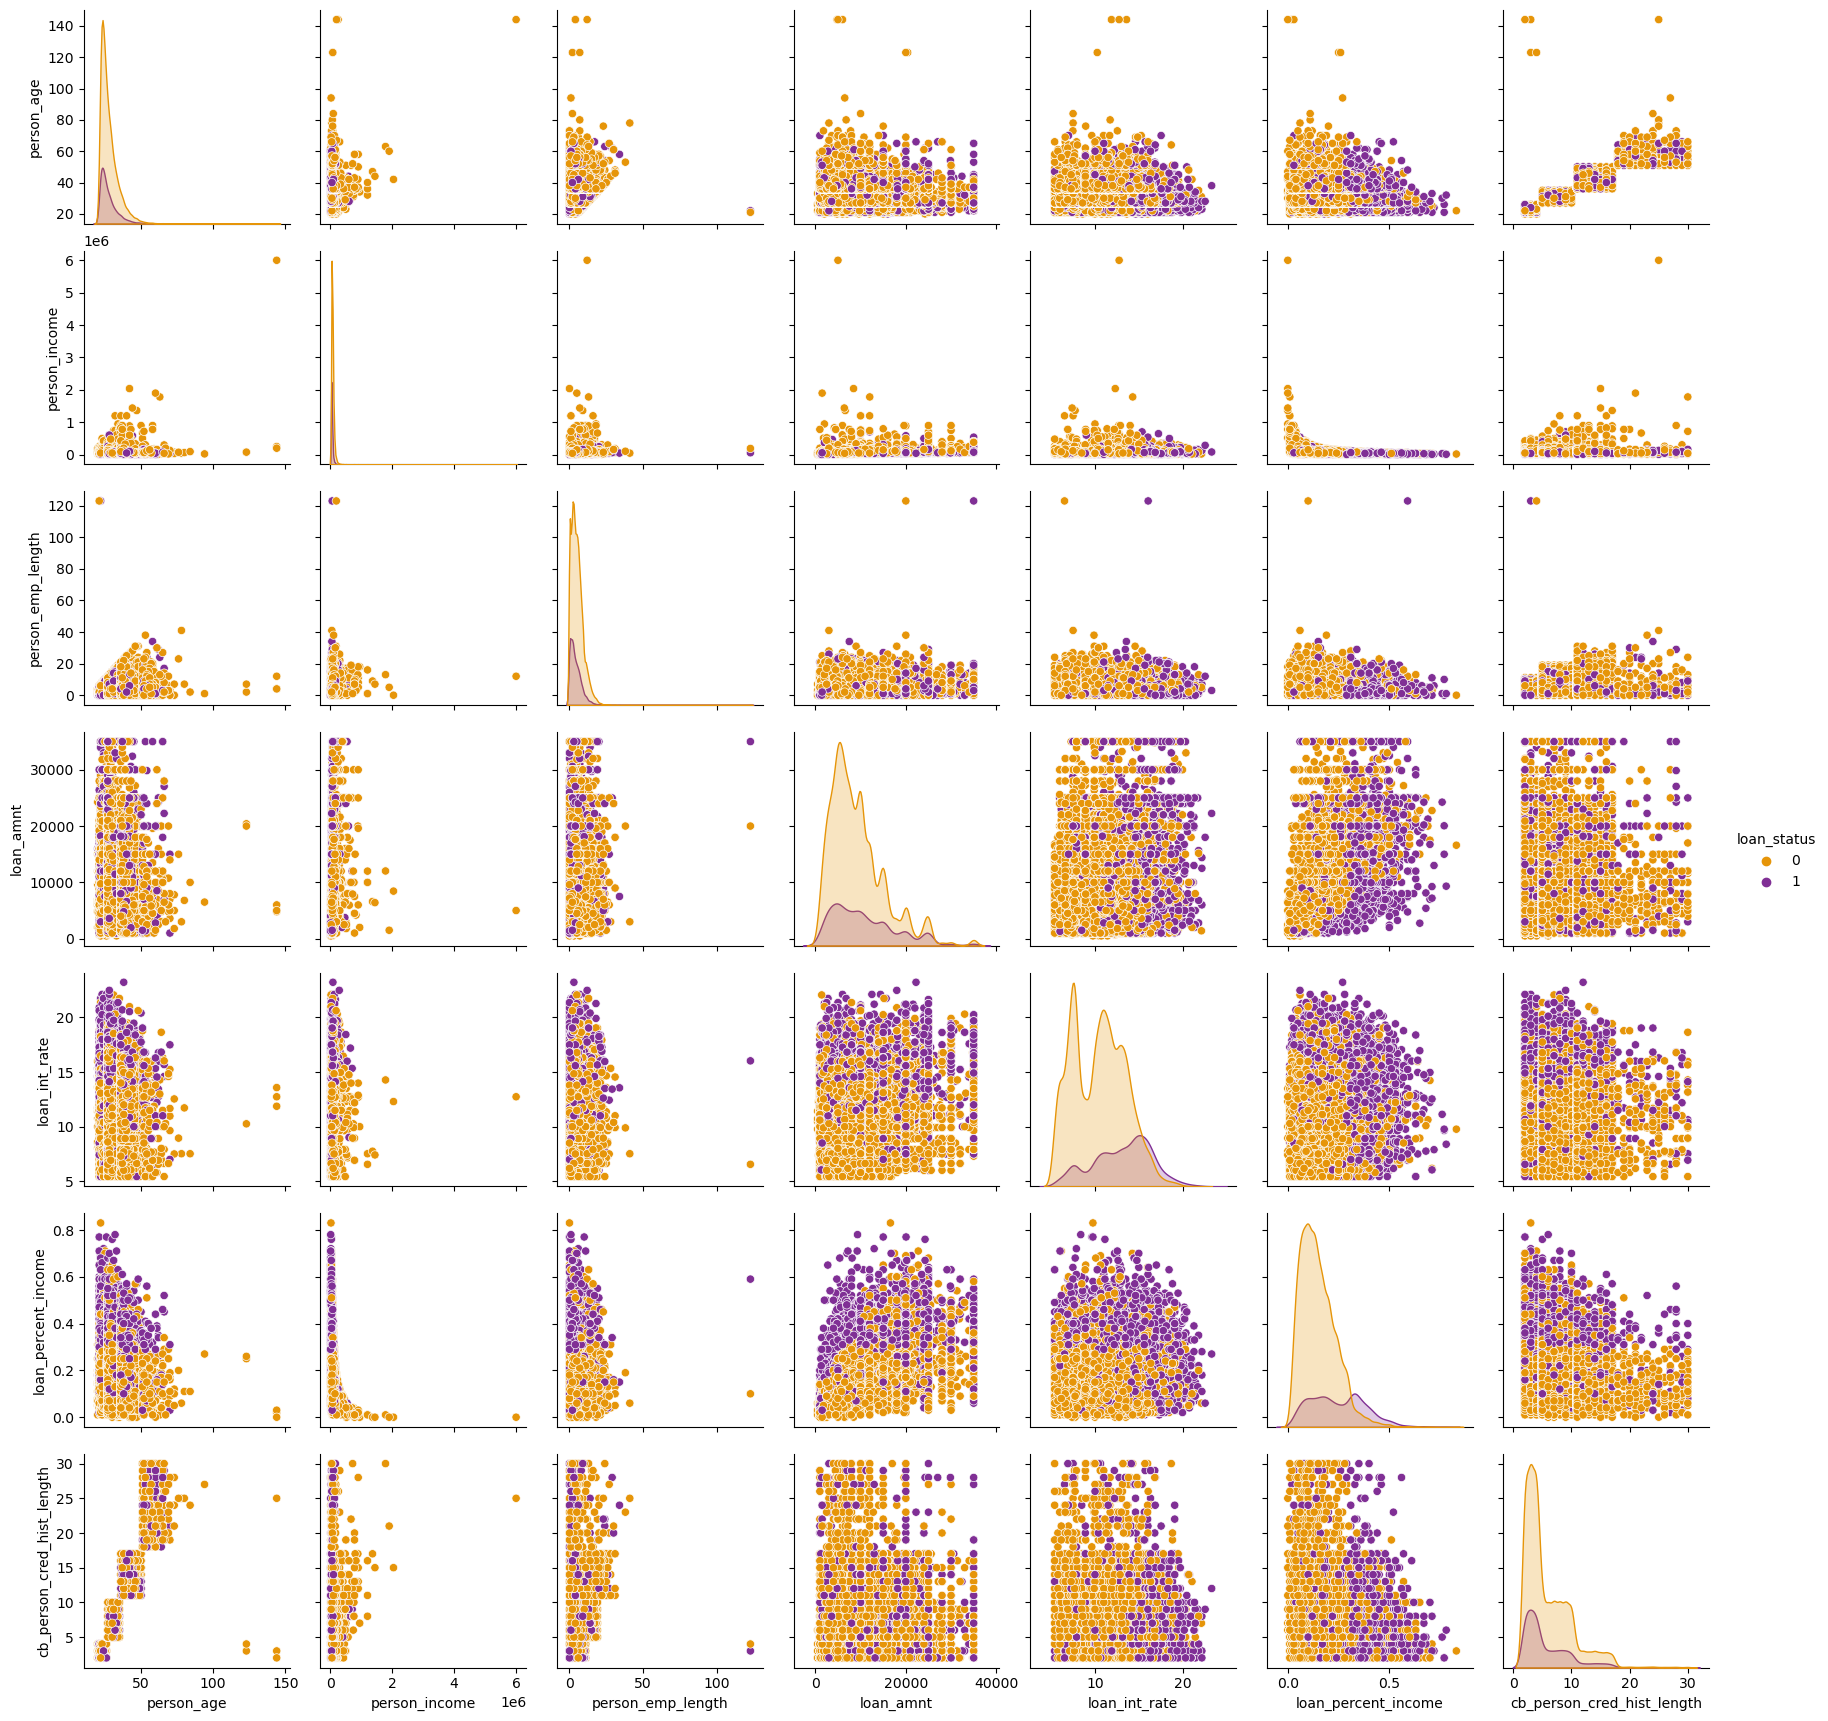

In [44]:
sns.pairplot(df_num, hue="loan_status", palette='CMRmap_r');

**Nhận xét:** Biểu đồ trên thấy sự tương quan giữa các biến với nhau và với biến target.

In [45]:
def des_sum_graph(column):
    fig, axs = plt.subplots(1,2,figsize=(19,6))
    x = data[data['loan_status']==0][column]
    y = data[data['loan_status']==1][column]
    # Creating histogram when loan_status is Default
    axs[0].hist(x, alpha=0.5, label='Not Default', color = '#C35617') 
    # Creating histogram when loan_status is Not Default
    axs[0].hist(y, alpha=0.5, label='Default', color = '#6A287E') 
    axs[0].legend(loc='upper right')
    # Boxplot to look quantitive data distribution when loan_status default or not default
    sns.boxplot(data=data0, x='loan_status', y=column, ax=axs[1], color = '#C35617') 
    fig.suptitle(f"Histogram and Boxplot of {column} variable according to loan_status variable", fontweight="bold")
    plt.show()
    print(f"\033[1mDescriptive summary of {column} variable when loan_status is Not Default: \033[0m")
    print(f"{data[data['loan_status']==0][column].describe().round(3)}")
    print(f"Range: {data[data['loan_status']==0][column].max() - data[data['loan_status']==0][column].min()}")
    print(f"Interquartile Range: {data[data['loan_status']==0][column].describe()[6] - data[data['loan_status']==0][column].describe()[4]}\n")
    print(f"Skewness: {skew(data[(data['loan_status']==0)&(data[column].isna()==False)][column], bias=True)}")
    print(f"Kurtosis: {kurtosis(data[(data['loan_status']==0)&(data[column].isna()==False)][column], bias=True)}\n")

    print(f"\033[1mDescriptive summary of {column} variable when loan_status is Default: \033[0m")
    print(f"{data[data['loan_status']==1][column].describe().round(3)}")
    print(f"Range: {data[data['loan_status']==1][column].max() - data[data['loan_status']==1][column].min()}")
    print(f"Interquartile Range: {data[data['loan_status']==1][column].describe()[6] - data[data['loan_status']==1][column].describe()[4]}\n")
    print(f"Skewness: {skew(data[(data['loan_status']==1)&(data[column].isna()==False)][column], bias=True)}")
    print(f"Kurtosis: {kurtosis(data[(data['loan_status']==1)&(data[column].isna()==False)][column], bias=True)}")

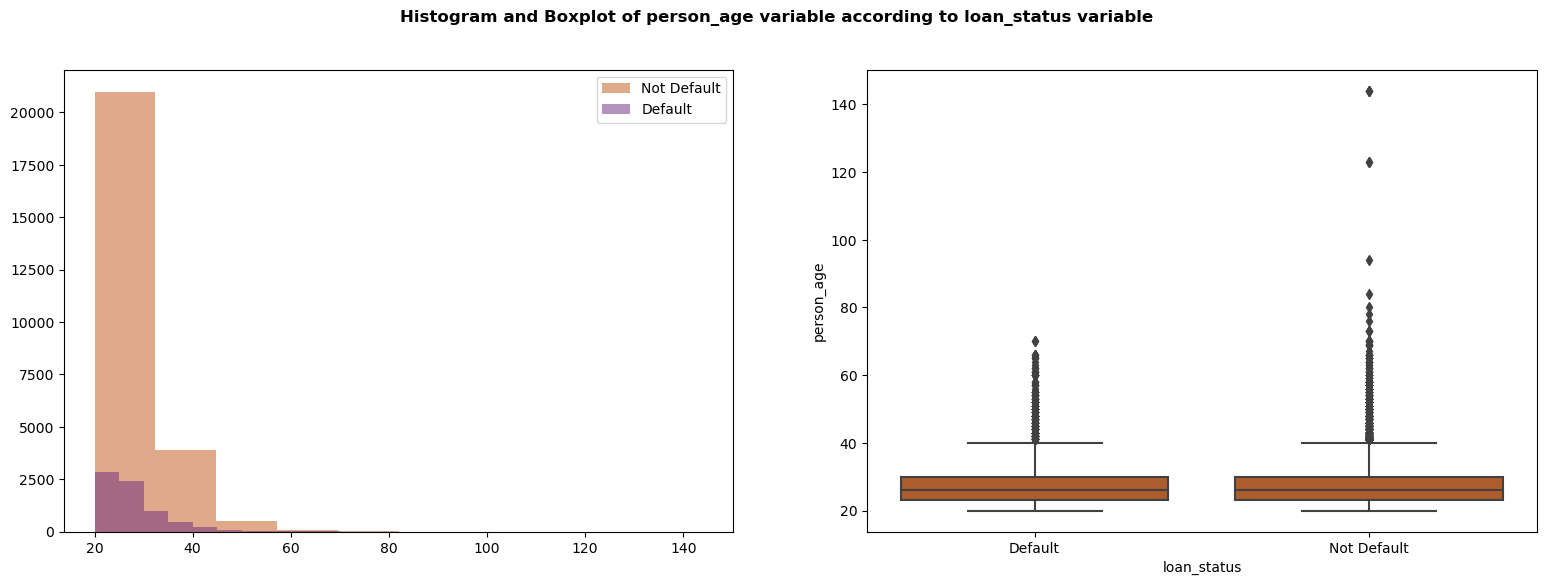

Descriptive summary of person_age variable when loan_status is Not Default: 
count    25473.000
mean        27.807
std          6.370
min         20.000
25%         23.000
50%         26.000
75%         30.000
max        144.000
Name: person_age, dtype: float64
Range: 124
Interquartile Range: 7.0

Skewness: 2.7400286093270987
Kurtosis: 21.927914649833067

Descriptive summary of person_age variable when loan_status is Default: 
count    7108.000
mean       27.475
std         6.264
min        20.000
25%        23.000
50%        26.000
75%        30.000
max        70.000
Name: person_age, dtype: float64
Range: 50
Interquartile Range: 7.0

Skewness: 1.9864350660147208
Kurtosis: 5.5546682560039


In [46]:
des_sum_graph(numerical[0])

**Nhận xét:** Khi `loan_staus` là **Not Default**, biến `person_age` rất dài, nhưng khi nó là **Default** thì hơi dài. Nhưng phân vị thứ 25 và 75 của mỗi loại lần lượt là 23 và 30. Giá trị trung bình và trung vị của từng loại rất gần nhau. Nhìn chung, biến `person_age` không thay đổi nhiều với các danh mục `loan_status`.

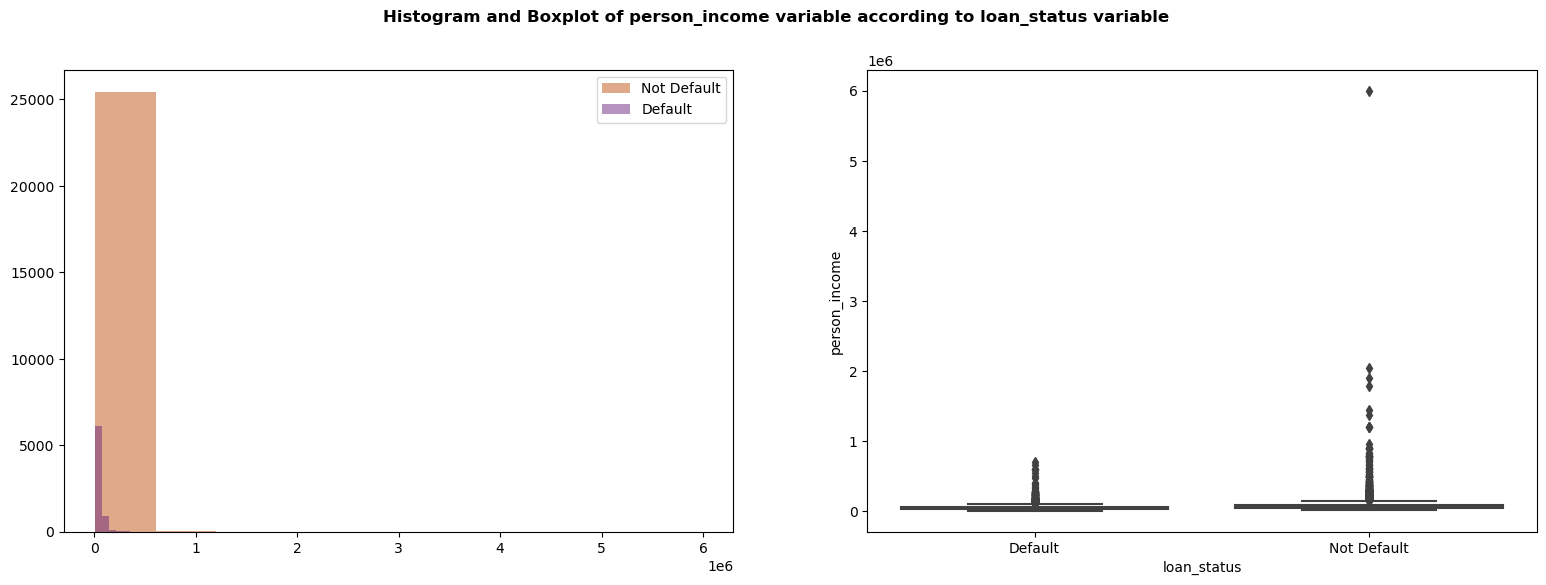

Descriptive summary of person_income variable when loan_status is Not Default: 
count      25473.000
mean       70804.362
std        66568.803
min         7000.000
25%        42000.000
50%        60000.000
75%        84000.000
max      6000000.000
Name: person_income, dtype: float64
Range: 5993000
Interquartile Range: 42000.0

Skewness: 33.529060903729345
Kurtosis: 2577.744868896311

Descriptive summary of person_income variable when loan_status is Default: 
count      7108.000
mean      49125.652
std       36907.377
min        4000.000
25%       30000.000
50%       41498.000
75%       59497.750
max      703800.000
Name: person_income, dtype: float64
Range: 699800
Interquartile Range: 29497.75

Skewness: 5.469860617680264
Kurtosis: 62.08992635342213


In [47]:
des_sum_graph(numerical[1])

**Nhận xét:** Biến `person_income` có đuôi rất dài và lệch phải rất nhiều khi `loan_status` là **Not Default**. Giá trị trung bình của `person_income` rất khác nhau khi `loan_status` là **Default** và khi **Not Default**. Độ lệch chuẩn cũng lớn hơn khi `loan_status` không phải là **Default**. Những người đi vay có thu nhập cao ít bị vỡ nợ hơn những người có thu nhập thấp.

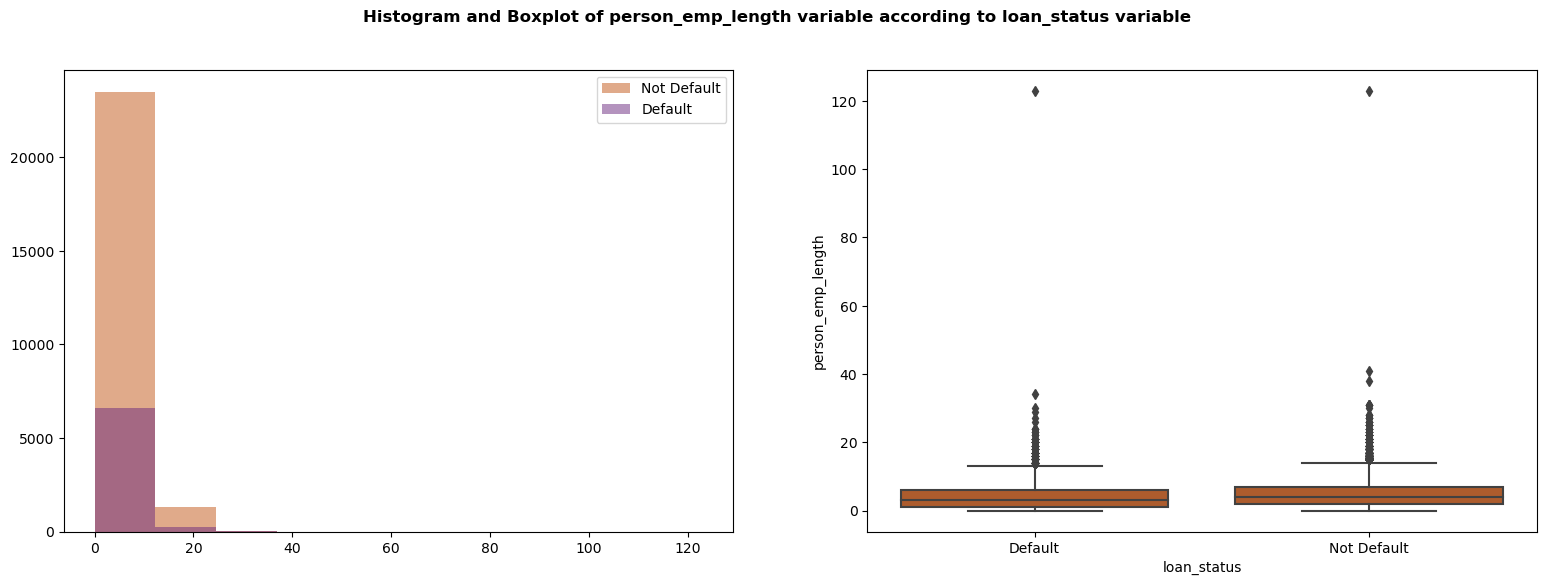

Descriptive summary of person_emp_length variable when loan_status is Not Default: 
count    24860.000
mean         4.969
std          4.129
min          0.000
25%          2.000
50%          4.000
75%          7.000
max        123.000
Name: person_emp_length, dtype: float64
Range: 123.0
Interquartile Range: 5.0

Skewness: 2.076156997436357
Kurtosis: 28.77219802840455

Descriptive summary of person_emp_length variable when loan_status is Default: 
count    6826.000
mean        4.138
std         4.127
min         0.000
25%         1.000
50%         3.000
75%         6.000
max       123.000
Name: person_emp_length, dtype: float64
Range: 123.0
Interquartile Range: 5.0

Skewness: 4.705807016373061
Kurtosis: 102.71281135059365


In [48]:
des_sum_graph(numerical[2])

**Nhận xét:** Biến `person_emp_length` hầu hết được phân phối từ 2 đến 7 khi `loan_status` là **Not Default** và hầu hết được phân phối từ 1 đến 6 khi `loan_status` là **Default**. Những người có thời gian làm việc ít hơn mặc định nhiều hơn. Tuy nhiên, những con số này gần nhau, nó không khác nhau nhiều. Nhưng dữ liệu bị lệch nhiều hơn và lệch phải khi `loan_status` là **Default**.

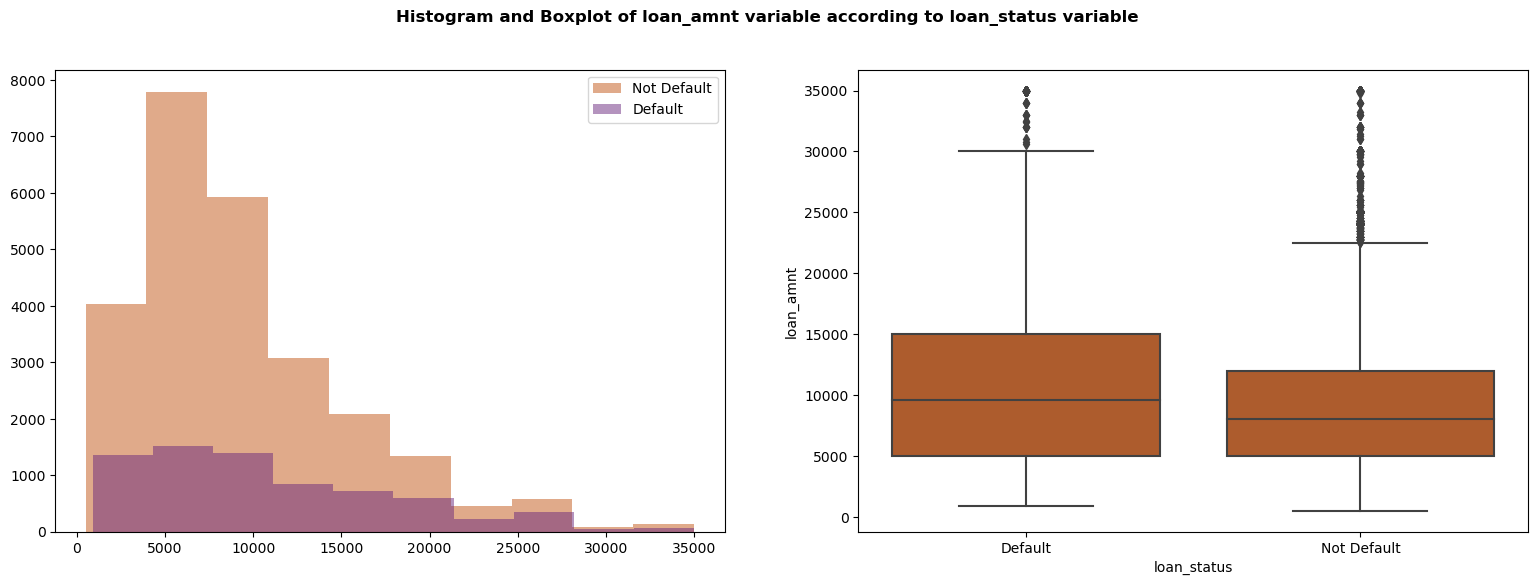

Descriptive summary of loan_amnt variable when loan_status is Not Default: 
count    25473.000
mean      9237.464
std       6026.375
min        500.000
25%       5000.000
50%       8000.000
75%      12000.000
max      35000.000
Name: loan_amnt, dtype: float64
Range: 34500
Interquartile Range: 7000.0

Skewness: 1.269924659627746
Kurtosis: 1.843290510672385

Descriptive summary of loan_amnt variable when loan_status is Default: 
count     7108.000
mean     10850.503
std       7143.345
min        900.000
25%       5000.000
50%       9600.000
75%      15000.000
max      35000.000
Name: loan_amnt, dtype: float64
Range: 34100
Interquartile Range: 10000.0

Skewness: 0.8988793967004107
Kurtosis: 0.3264558952011054


In [49]:
des_sum_graph(numerical[3])

**Nhận xét:** Từ các bản phân phối, chúng ta có thể thấy rằng **Default** được phân phối ở nơi `loan_amnt` cao hơn. Hơn nữa, `loan_amnt` trung bình cho Default cao hơn **Not Default**. Theo dữ liệu, những người vay với số tiền vay lớn sẽ bị vỡ nợ nhiều hơn.

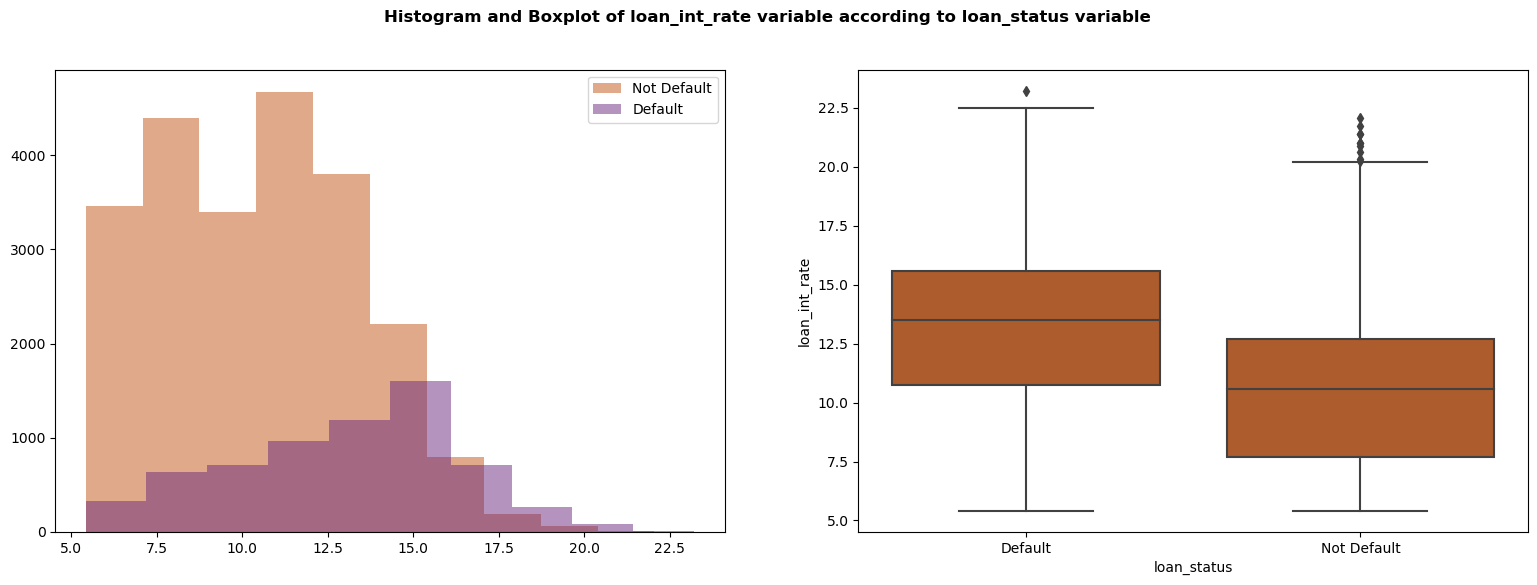

Descriptive summary of loan_int_rate variable when loan_status is Not Default: 
count    23001.000
mean        10.436
std          2.982
min          5.420
25%          7.680
50%         10.590
75%         12.690
max         22.060
Name: loan_int_rate, dtype: float64
Range: 16.64
Interquartile Range: 5.01

Skewness: 0.2313653361192519
Kurtosis: -0.683414618038741

Descriptive summary of loan_int_rate variable when loan_status is Default: 
count    6464.000
mean       13.060
std         3.293
min         5.420
25%        10.740
50%        13.490
75%        15.580
max        23.220
Name: loan_int_rate, dtype: float64
Range: 17.799999999999997
Interquartile Range: 4.84

Skewness: -0.263038547464794
Kurtosis: -0.5206109434647219


In [50]:
des_sum_graph(numerical[4])

**Nhận xét:** Lãi suất cũng cao hơn đối với những người đi vay không trả được nợ. Nó chủ yếu được phân phối trong khoảng từ 7,68 đến 12,69 khi `loan_status` là **Default** và được phân phối chủ yếu trong khoảng từ 10,74 đến 15,58 khi `loan_status` là **Not Default**.

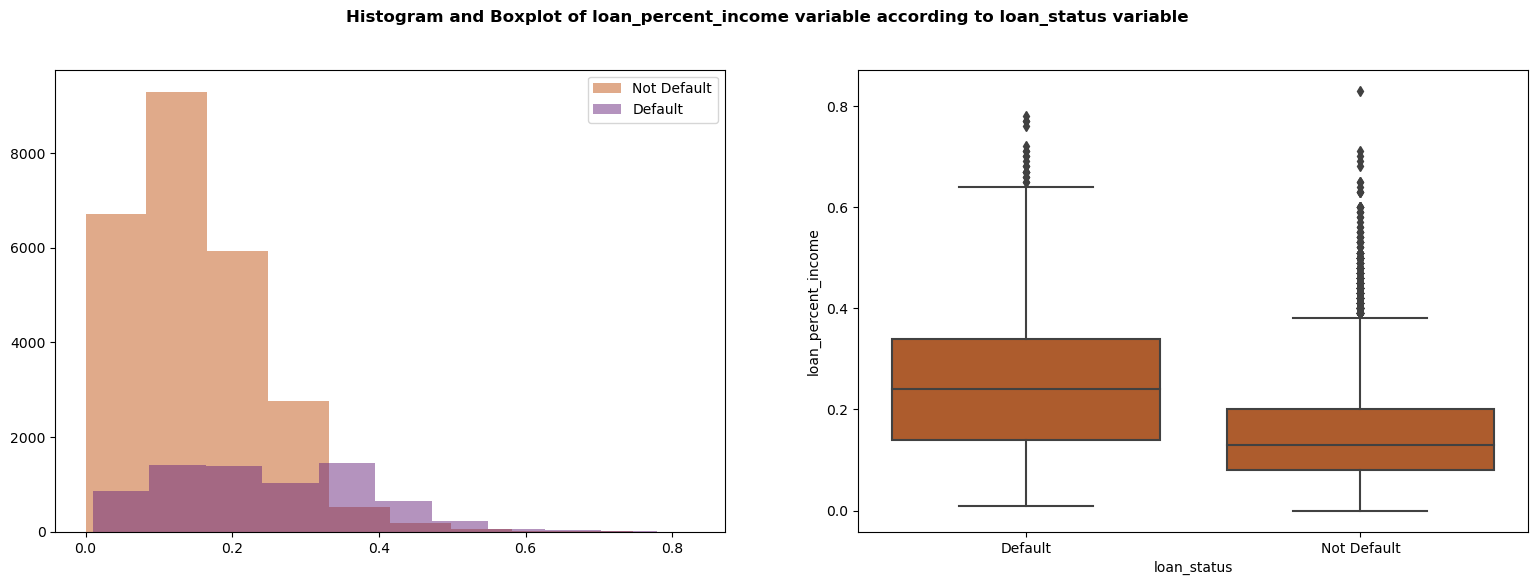

Descriptive summary of loan_percent_income variable when loan_status is Not Default: 
count    25473.000
mean         0.149
std          0.087
min          0.000
25%          0.080
50%          0.130
75%          0.200
max          0.830
Name: loan_percent_income, dtype: float64
Range: 0.83
Interquartile Range: 0.12000000000000001

Skewness: 1.0254043413095986
Kurtosis: 1.6734886187165587

Descriptive summary of loan_percent_income variable when loan_status is Default: 
count    7108.000
mean        0.247
std         0.132
min         0.010
25%         0.140
50%         0.240
75%         0.340
max         0.780
Name: loan_percent_income, dtype: float64
Range: 0.77
Interquartile Range: 0.2

Skewness: 0.3550139477085601
Kurtosis: -0.45005477600027977


In [51]:
des_sum_graph(numerical[5])

**Nhận xét:** `loan_percent_income` cao hơn đối với những người đi vay không trả được nợ. Có nghĩa là khi loan_status là **Not Default** là 0,149, khi `loan_status` là **Default** là 0,247.

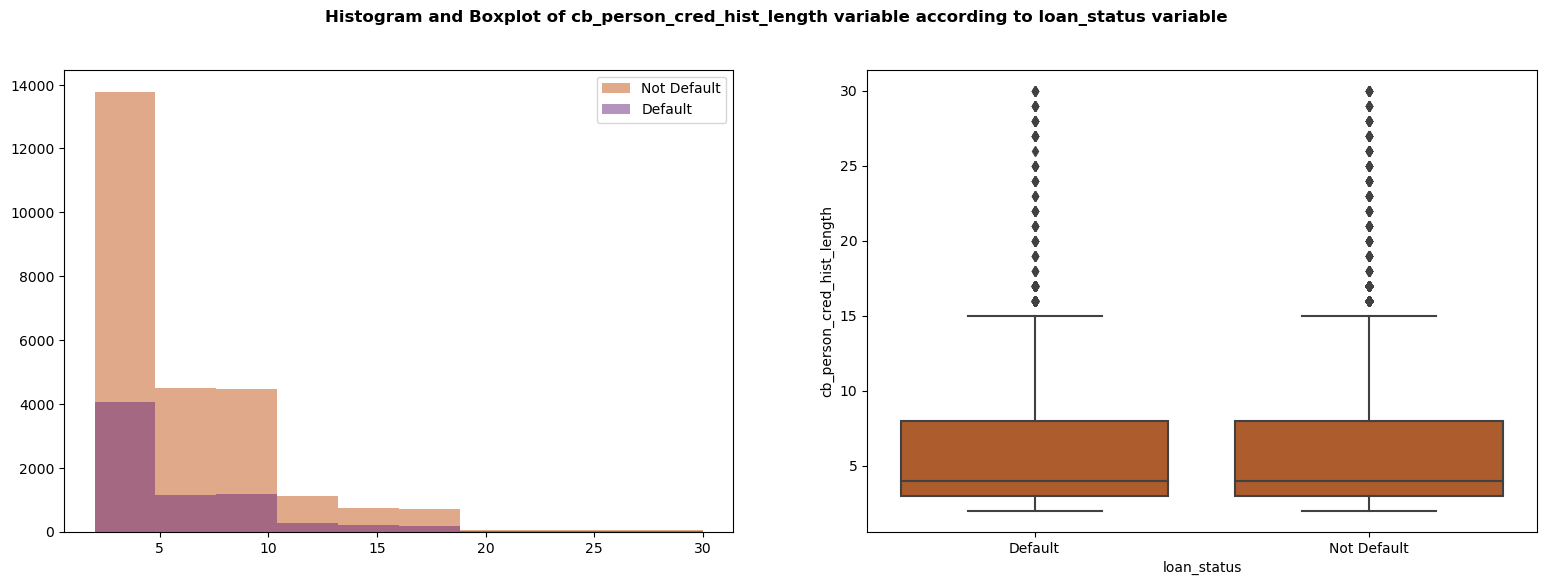

Descriptive summary of cb_person_cred_hist_length variable when loan_status is Not Default: 
count    25473.000
mean         5.837
std          4.041
min          2.000
25%          3.000
50%          4.000
75%          8.000
max         30.000
Name: cb_person_cred_hist_length, dtype: float64
Range: 28
Interquartile Range: 5.0

Skewness: 1.617261647473767
Kurtosis: 3.479553617656313

Descriptive summary of cb_person_cred_hist_length variable when loan_status is Default: 
count    7108.000
mean        5.685
std         4.103
min         2.000
25%         3.000
50%         4.000
75%         8.000
max        30.000
Name: cb_person_cred_hist_length, dtype: float64
Range: 28
Interquartile Range: 5.0

Skewness: 1.8187492635987719
Kurtosis: 4.545567348905099


In [52]:
des_sum_graph(numerical[6])

**Nhận xét:** **cb_person_cred_hist_length** không thay đổi nhiều theo từng danh mục. Tuy nhiên, giá trị trung bình cao hơn khi `loan_status` là **Default**.

**b) loan_status vs categorical variables**

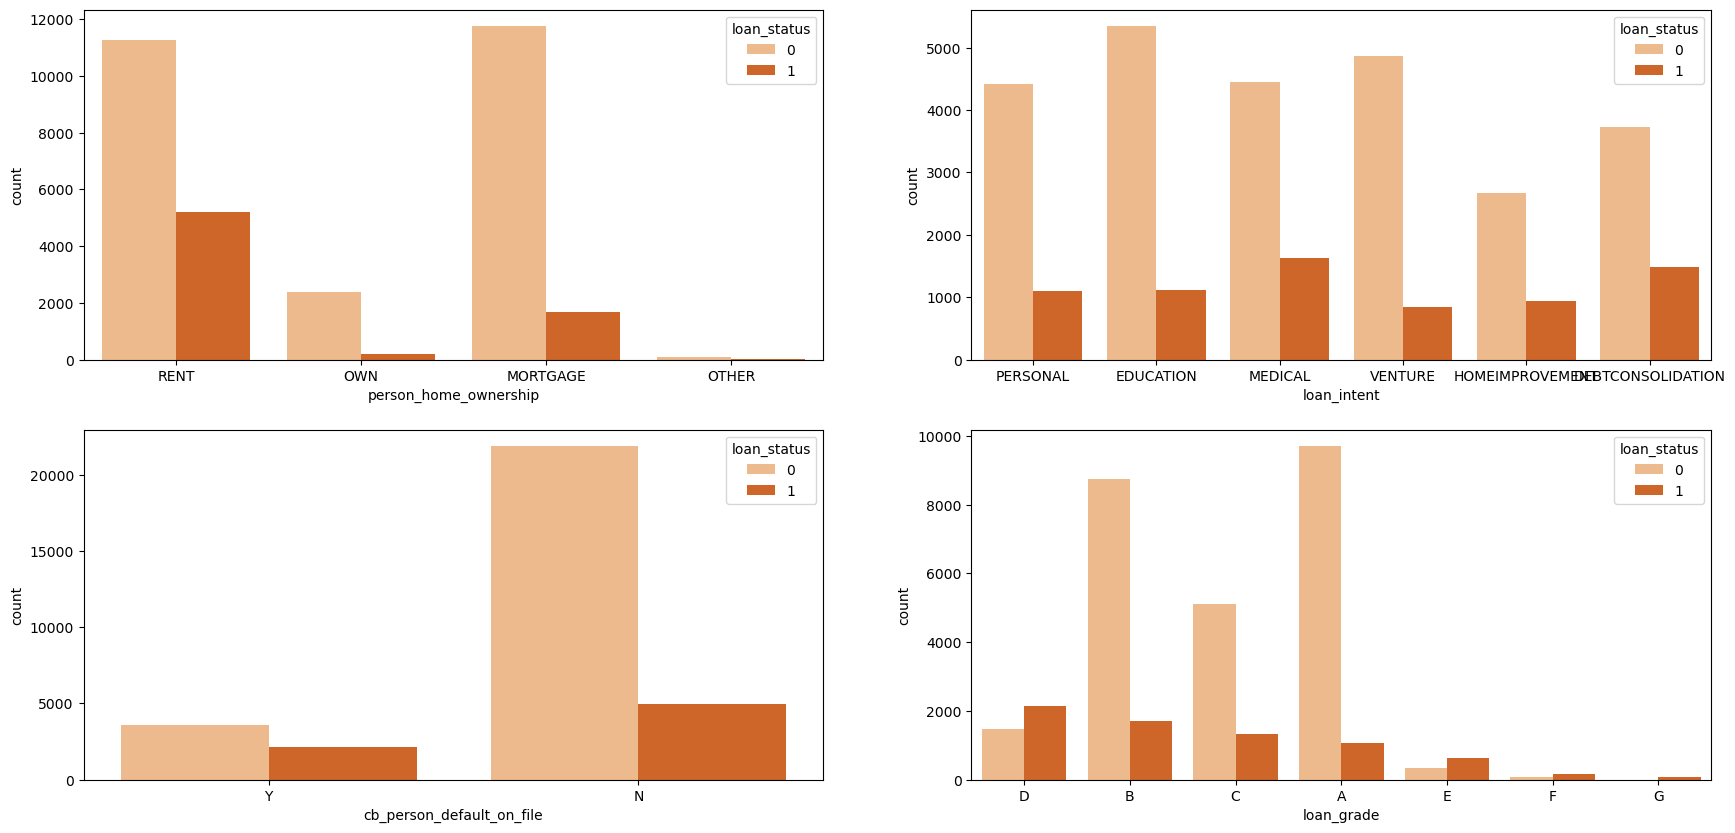

In [53]:
fig,axes = plt.subplots(2,2, figsize=(21,10))

sns.countplot(x=data['person_home_ownership'], data=data, hue="loan_status", ax=axes[0,0], palette='Oranges')
sns.countplot(x=data['loan_intent'], data=data, hue="loan_status", ax=axes[0,1], palette='Oranges')
sns.countplot(x=data['loan_grade'], data=data, hue="loan_status", ax=axes[1,1], palette='Oranges')
sns.countplot(x=data['cb_person_default_on_file'], hue="loan_status", data=data, ax=axes[1,0], palette='Oranges');

**Contigency Table**

Để hiển thị mối liên hệ giữa hai biến phân loại, chúng ta có thể sử dụng Contigency Table. Các hàng của Contigency Table liệt kê các danh mục của một biến và các cột của nó liệt kê các danh mục của biến kia. Mỗi mục trong bảng là số lượng quan sát trong mẫu ở một tổ hợp cụ thể các loại của hai biến phân loại.

In [54]:
def contigency_table(column):
    crosstable1 = pd.crosstab(data0[column],data0['loan_status']).reset_index()
    crosstable2 = pd.crosstab(data0[column],data0['loan_status']).apply(lambda r: round(r/r.sum()*100,2), axis=1).reset_index()
    crosstable = pd.merge(crosstable1, crosstable2, how='inner', on=column).set_index(column)
    crosstable.columns = ['Default', 'Not_Default', '%Default', '%Not_Default']
    return crosstable

Trong bảng dự phòng, chúng tôi cũng đã thêm tỷ lệ phần trăm của từng danh mục vào biến phản hồi.

**Bar graphs**

Bar graphs cạnh nhau cho phép ta so sánh dễ dàng.

In [55]:
def bar_graphs(data):
    N = data.shape[0]
    default_bar = list(data['%Default'])
    nondefault_bar = list(data['%Not_Default'])
    ind = np.arange(N)
    plt.figure(figsize=(10,5))
    width = 0.3       
    plt.bar(ind, default_bar , width, color='#FFDEAD', label='% Default')
    plt.bar(ind + width, nondefault_bar, width, color='#C35617', label='% Not Default')
    plt.xlabel(f"{data.index.name}")
    plt.ylabel('Percentages')
    plt.title(f"Percentage Comparison of {data.index.name} variable")
    plt.xticks(ind + width / 2, list(data.index))
    plt.legend(loc='best')
    plt.show()

**Nhận xét:**
+ Các khoản vay thuộc danh mục **Mortage** (Thế chấp) và own hiếm khi bị vỡ nợ. **RENT** (Tiền thuê nhà) và các khoản cho vay thuộc danh mục khác bị vỡ nợ nhiều hơn.

Default  Not_Default  %Default  %Not_Default
person_home_ownership                                              
MORTGAGE                  1690        11754     12.57         87.43
OTHER                       33           74     30.84         69.16
OWN                        193         2391      7.47         92.53
RENT                      5192        11254     31.57         68.43

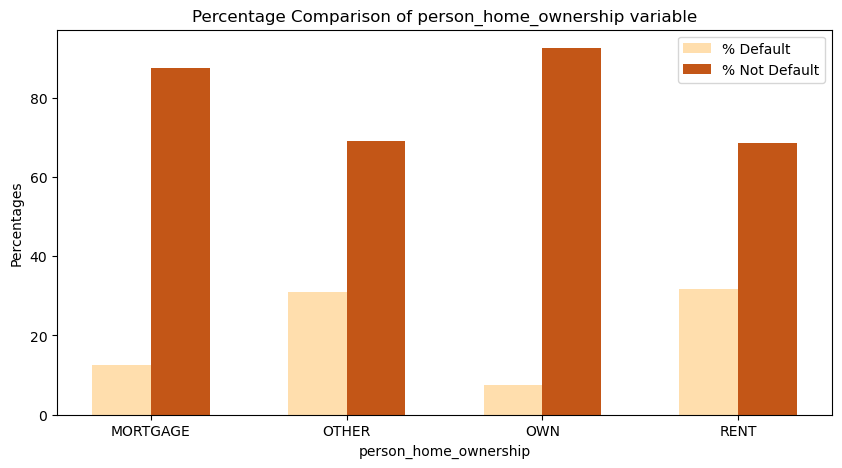

In [56]:
display(contigency_table(categorical[0]))
bar_graphs(contigency_table(categorical[0]))

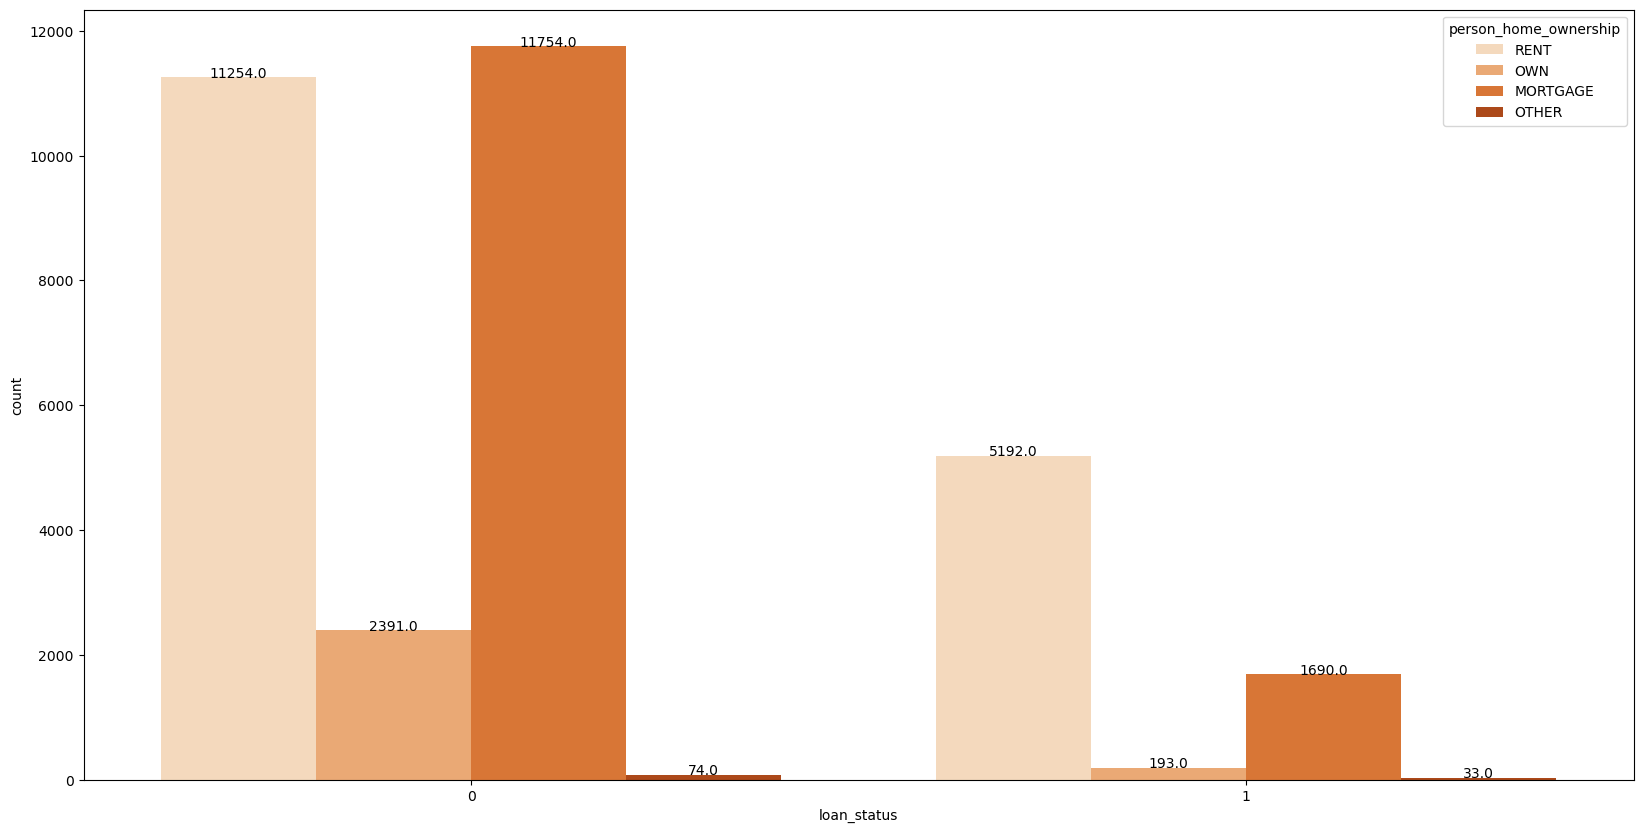

In [57]:
# Cách trình bày khác
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1, x='loan_status', hue="person_home_ownership", data=data, palette="Oranges")
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.1, height, ha="center")

Default  Not_Default  %Default  %Not_Default
loan_intent                                                    
DEBTCONSOLIDATION     1490         3722     28.59         71.41
EDUCATION             1111         5342     17.22         82.78
HOMEIMPROVEMENT        941         2664     26.10         73.90
MEDICAL               1621         4450     26.70         73.30
PERSONAL              1098         4423     19.89         80.11
VENTURE                847         4872     14.81         85.19

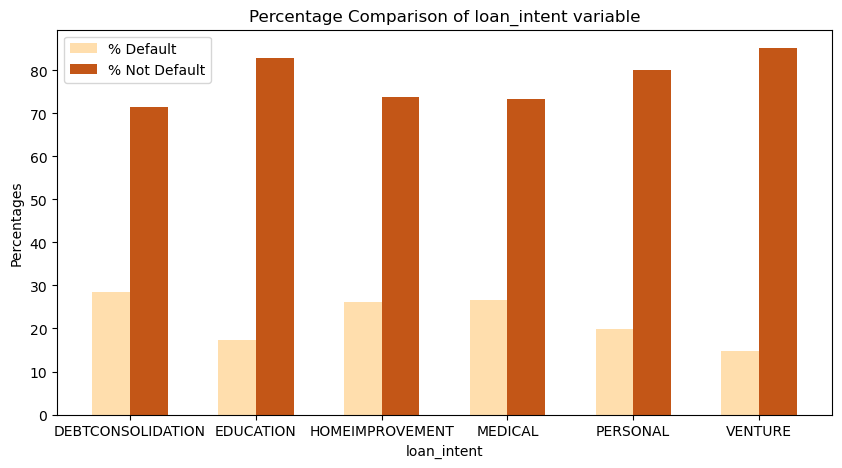

In [58]:
display(contigency_table(categorical[1]))
bar_graphs(contigency_table(categorical[1]))

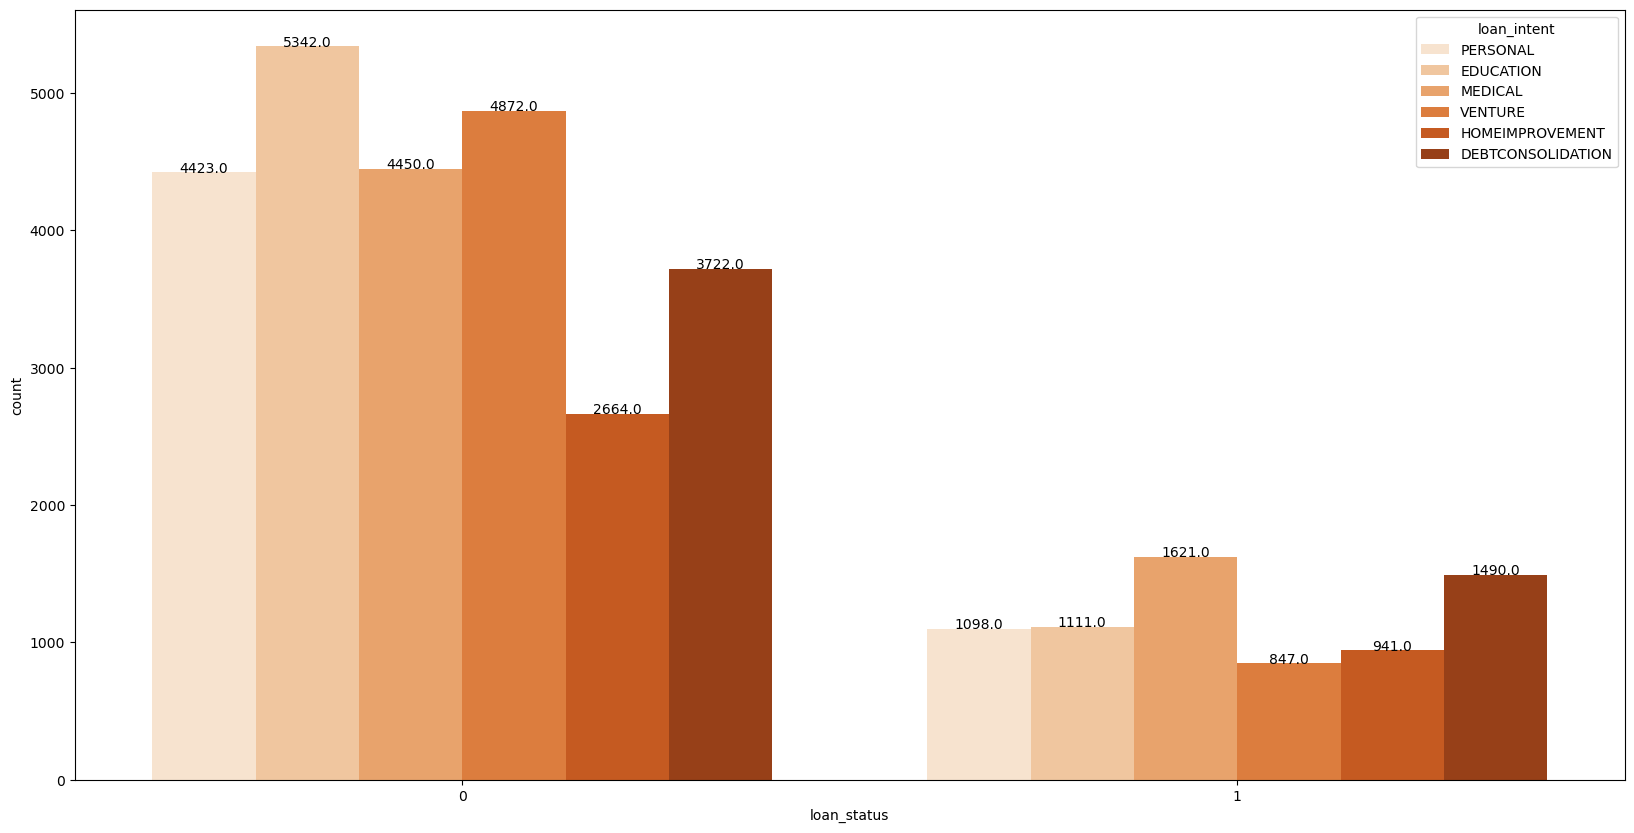

In [59]:
# Cách trình bày khác
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1, x='loan_status', hue="loan_intent", data=data, palette="Oranges")
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.1, height, ha="center")

**Nhận xét:**
+ Các khoản cho vay có lý do xiết nợ bị vỡ nợ nhiều nhất. Các khoản vay với mục đích giáo dục (**EDUCATION**) và mạo hiểm (**VENTURE**) đã khiến hợp đồng thuê không trả được nợ. Nhìn chung, không có nhiều biến thể về tỷ lệ vỡ nợ giữa các danh mục `loan_intent`.

Default  Not_Default  %Default  %Not_Default
loan_grade                                              
A              1073         9704      9.96         90.04
B              1701         8750     16.28         83.72
C              1339         5119     20.73         79.27
D              2141         1485     59.05         40.95
E               621          343     64.42         35.58
F               170           71     70.54         29.46
G                63            1     98.44          1.56

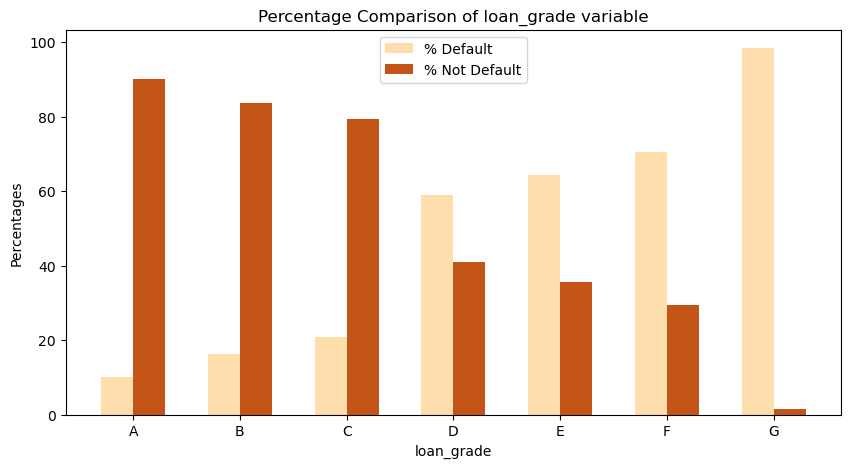

In [60]:
display(contigency_table(categorical[2]))
bar_graphs(contigency_table(categorical[2]))

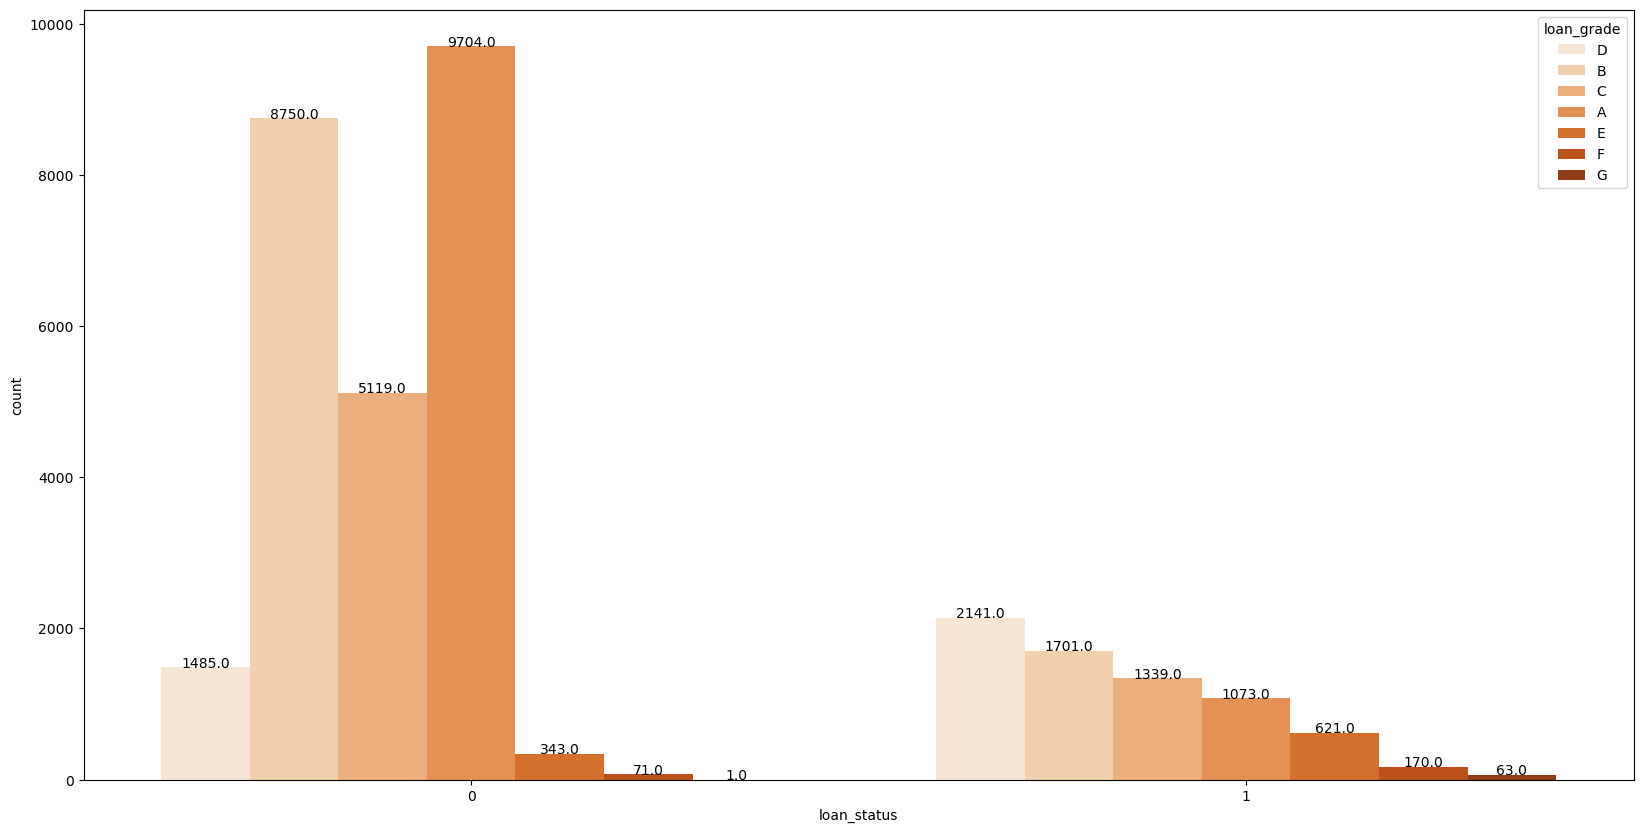

In [61]:
# Cách trình bày khác
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1, x='loan_status', hue="loan_grade", data=data, palette="Oranges")
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.1, height, ha="center")

**Nhận xét:** Tỷ lệ vỡ nợ của khoản vay lần lượt từ A đến G tăng lên.

Default  Not_Default  %Default  %Not_Default
cb_person_default_on_file                                              
N                             4936        21900     18.39         81.61
Y                             2172         3573     37.81         62.19

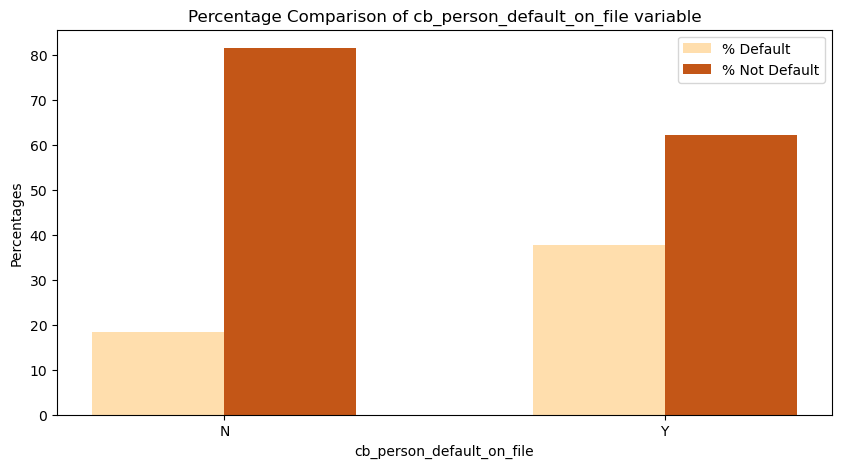

In [62]:
display(contigency_table(categorical[4]))
bar_graphs(contigency_table(categorical[4]))

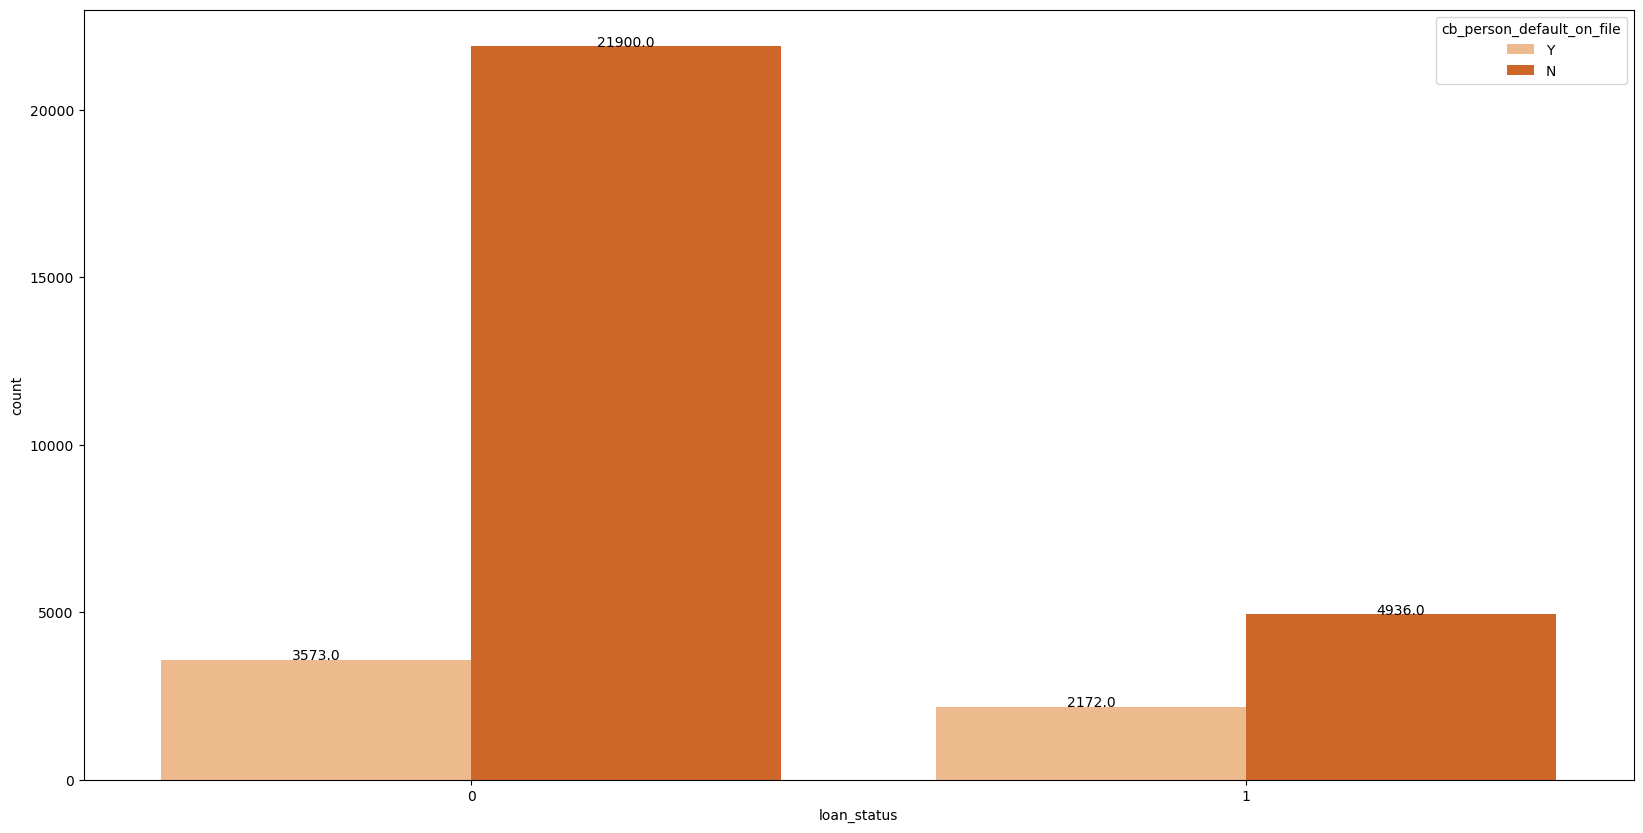

In [63]:
# Cách trình bày khác
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1, x='loan_status', hue="cb_person_default_on_file", data=data, palette="Oranges")
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.1, height, ha="center")

**Nhận xét:** Người vay có hồ sơ vỡ nợ trước đó nhiều hơn không có hồ sơ vỡ nợ trước đó.

<a class="anchor" id="3"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">3. DATA TRANSFORMATION</p>

[**Table of Contents**](#0.1)

### 3.1 Feature Selection <a class="anchor" id="3.1"></a>

In [64]:
cor_target = data.corrwith(data["loan_status"])
cor_target.sort_values(axis = 0, ascending = False)

loan_status                   1.000000
loan_percent_income           0.379366
loan_int_rate                 0.335133
loan_amnt                     0.105376
cb_person_cred_hist_length   -0.015529
person_age                   -0.021629
person_emp_length            -0.082489
person_income                -0.144449
dtype: float64

In [65]:
data.corr()

person_age  person_income  person_emp_length  \
person_age                    1.000000       0.173202           0.163106   
person_income                 0.173202       1.000000           0.134268   
person_emp_length             0.163106       0.134268           1.000000   
loan_amnt                     0.050787       0.266820           0.113082   
loan_int_rate                 0.012580       0.000792          -0.056405   
loan_status                  -0.021629      -0.144449          -0.082489   
loan_percent_income          -0.042411      -0.254471          -0.054111   
cb_person_cred_hist_length    0.859133       0.117987           0.144699   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.050787       0.012580    -0.021629   
person_income                0.266820       0.000792    -0.144449   
person_emp_length            0.113082      -0.056405    -0.082489   
loan_amnt                    1.000000       0.146813     0.105376   
loan_int_rate                0.146813       1.000000     0.335133   
loan_status                  0.105376       0.335133     1.000000   
loan_percent_income          0.572612       0.120314     0.379366   
cb_person_cred_hist_length   0.041967       0.016696    -0.015529   

                            loan_percent_income  cb_person_cred_hist_length  
person_age                            -0.042411                    0.859133  
person_income                         -0.254471                    0.117987  
person_emp_length                     -0.054111                    0.144699  
loan_amnt                              0.572612                    0.041967  
loan_int_rate                          0.120314                    0.016696  
loan_status                            0.379366                   -0.015529  
loan_percent_income                    1.000000                   -0.031690  
cb_person_cred_hist_length            -0.031690                    1.000000

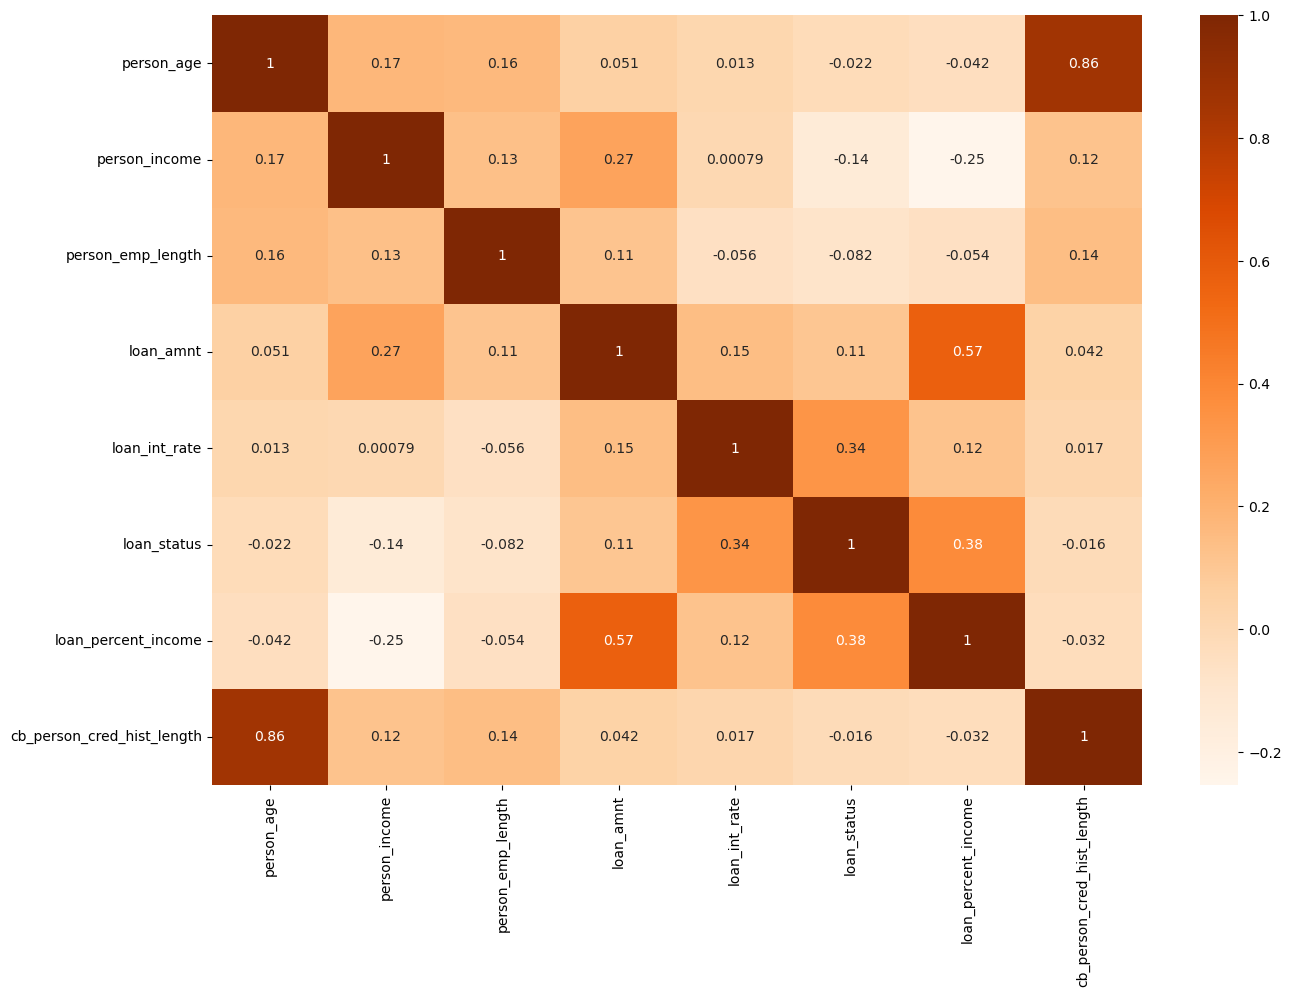

In [66]:
# Correlation using heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), annot = True, cmap='Oranges')
plt.show();

**Nhận xét:**
+ Vì trong dataset này số lượng feature ít (feature = 11) bao gồm các feature thuộc object.
+ Do đó, ta sẽ sử dụng tất cả các feature cho bài toán dự đoán **Credit Risk**.

### 3.2 Imbalanced Data <a class="anchor" id="3.2"></a>

**Handling Missing Values**

In [67]:
emp_len_null = data[data['person_emp_length'].isnull()].index
int_rate_null = data[data['loan_int_rate'].isnull()].index

data['person_emp_length'].fillna((data['person_emp_length'].median()), inplace=True)
data['loan_int_rate'].fillna((data['loan_int_rate'].median()), inplace = True)

data = data.rename(columns = {"cb_person_default_on_file":"default_hist", 
                              "cb_person_cred_hist_length": "cr_hist_len"})

data = data[data['person_age']<=100]

# OneHot encoding categorical variables
num_col = data.select_dtypes(exclude = 'object')
char_col = data.select_dtypes(include = 'object')

encoded_char_col = pd.get_dummies(char_col)

data = pd.concat([num_col, encoded_char_col], axis=1)
data.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_status  loan_percent_income  cr_hist_len  \
0            1                 0.59            3   
1            0                 0.10            2   
2            1                 0.57            3   
3            1                 0.53            2   
4            1                 0.55            4   

   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  ...  \
0                               0                            0  ...   
1                               0                            0  ...   
2                               1                            0  ...   
3                               0                            0  ...   
4                               0                            0  ...   

   loan_intent_VENTURE  loan_grade_A  loan_grade_B  loan_grade_C  \
0                    0             0             0             0   
1                    0             0             1             0   
2                    0             0             0             1   
3                    0             0             0             1   
4                    0             0             0             1   

   loan_grade_D  loan_grade_E  loan_grade_F  loan_grade_G  default_hist_N  \
0             1             0             0             0               0   
1             0             0             0             0               1   
2             0             0             0             0               1   
3             0             0             0             0               1   
4             0             0             0             0               0   

   default_hist_Y  
0               1  
1               0  
2               0  
3               0  
4               1  

[5 rows x 27 columns]

**Using Over-Sampling for Imbalanced Data**

In [68]:
# Using SMOTE method to over sample the data
from imblearn.over_sampling import SMOTE

sm = SMOTE()

dataset_dummy = pd.get_dummies(data, drop_first=True)

X = dataset_dummy.drop(["loan_status"],axis=1)
y = dataset_dummy['loan_status']

X_sm, y_sm = sm.fit_resample(X, y)
X_sm.shape, y_sm.shape

((50936, 26), (50936,))

In [69]:
# Using SMOTE method to over sample the data
x, y = data.drop('loan_status', axis=1), data['loan_status']
x.shape, y.shape

((32576, 26), (32576,))

In [70]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x, y = smote.fit_resample(x,y)

In [71]:
x.shape, y.shape

((50936, 26), (50936,))

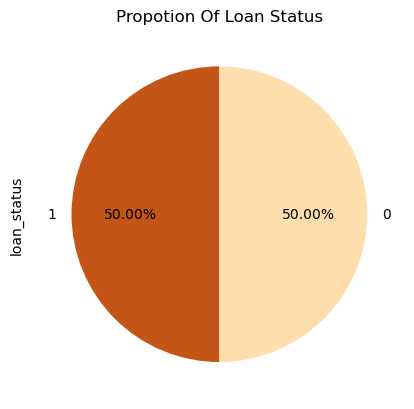

In [72]:
plt.title('Propotion Of Loan Status')
y.value_counts().plot(kind='pie', autopct="%.2f%%", 
                      startangle = 90, colors = ['#C35617', '#FFDEAD'])
plt.show();

**Nhận xét:** Sau khi điều chỉnh, dữ liệu trở thành dạng **Balance**.

### 3.3 Splitting and training <a class="anchor" id="3.3"></a>

In [73]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [74]:
from sklearn.model_selection import train_test_split
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(
                                            data.drop(labels=['loan_status'], axis=1),
                                            data['loan_status'],
                                            test_size=0.3,
                                            random_state=0)

In [75]:
X_train.shape, X_test.shape

((22803, 26), (9773, 26))

In [76]:
y_train.shape, y_test.shape

((22803,), (9773,))

<a class="anchor" id="4"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">4. MODEL BUILDING</p>

[**Table of Contents**](#0.1)

In [77]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
def Visualize_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['No Default','Default'], yticklabels=['No Default','Default'])
    plt.title('Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return

### 4.1 Logistic Regression <a class="anchor" id="4.1"></a>

**Training the Logistic Regression on the Training set**

In [79]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
acc1 = accuracy_score(y_test, y_pred)

In [80]:
# Train Score
train_score = LR_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.8035


**Testing the Logistic Regression on the Testing set**

In [81]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.1598
Precision score: 0.7074
F1-Score: 0.2608
Accuracy score: 0.8051


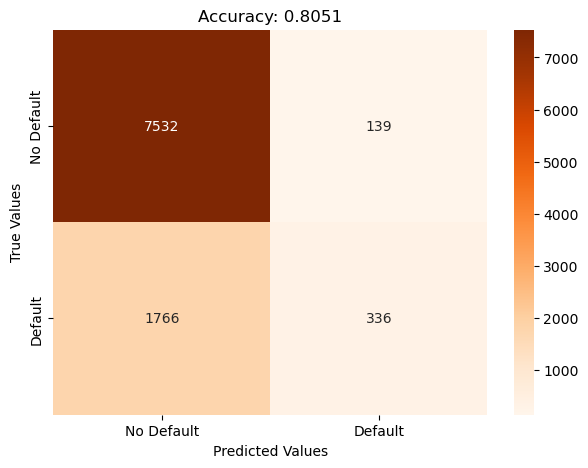



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7671
           1       0.71      0.16      0.26      2102

    accuracy                           0.81      9773
   macro avg       0.76      0.57      0.57      9773
weighted avg       0.79      0.81      0.75      9773



In [82]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.8035**.
+ Score của tập Test là **0.8051**.
+ Nhìn chung, mức độ chênh lệch của 2 score giữa 2 tập data rất nhỏ. Do đó, model phù hợp nhưng độ chính xác không cao.

### 4.2 Naive Bayes <a class="anchor" id="4.2"></a>

**Training the Naive Bayes on the Training set**

In [83]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)
acc2 = accuracy_score(y_test, y_pred)

In [84]:
# Train Score
train_score = NB_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.8161


**Testing the Naive Bayes on the Testing set**

In [85]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.2969
Precision score: 0.6972
F1-Score: 0.4164
Accuracy score: 0.8210


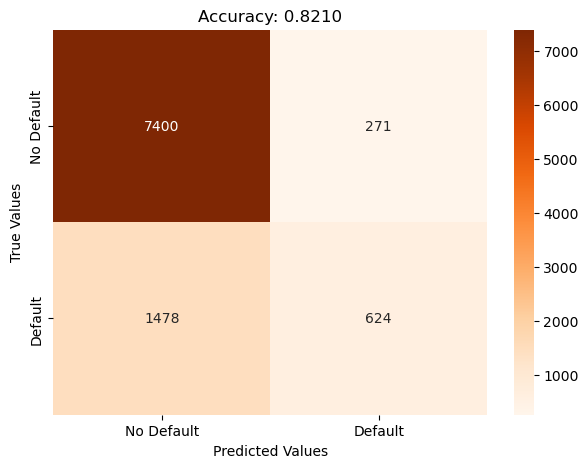



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7671
           1       0.70      0.30      0.42      2102

    accuracy                           0.82      9773
   macro avg       0.77      0.63      0.66      9773
weighted avg       0.80      0.82      0.79      9773



In [86]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.8161**.
+ Score của tập Test là **0.8210**.
+ Nhìn chung, mức độ chênh lệch của 2 score giữa 2 tập data rất nhỏ. Do đó, model phù hợp nhưng độ chính xác không cao.

### 4.3 KNN <a class="anchor" id="4.3"></a>

**Training the KNN on the Training set**

In [87]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
acc3 = accuracy_score(y_test, y_pred)

In [88]:
# Train Score
train_score = KNN_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.8754


**Testing the KNN on the Testing set**

In [89]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.4881
Precision score: 0.6365
F1-Score: 0.5525
Accuracy score: 0.8299


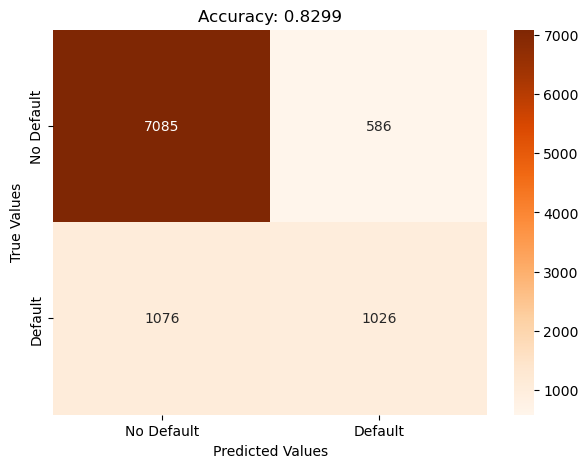



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      7671
           1       0.64      0.49      0.55      2102

    accuracy                           0.83      9773
   macro avg       0.75      0.71      0.72      9773
weighted avg       0.82      0.83      0.82      9773



In [90]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.8754**.
+ Score của tập Test là **0.8299**.
+ Nhìn chung, mức độ chênh lệch của 2 score giữa 2 tập data khoảng 5%. Do đó, model có thể bị overfitting.

### 4.4 Decision Tree <a class="anchor" id="4.4"></a>

**Training Decision Tree Classification on Train set**

In [91]:
from sklearn.tree import DecisionTreeClassifier
DTR_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTR_model.fit(X_train, y_train)
y_pred = DTR_model.predict(X_test)
acc4 = accuracy_score(y_test, y_pred)

In [92]:
# Train Score
train_score = DTR_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


**Testing Decision Tree Classification on the Testing set**

In [93]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.7640
Precision score: 0.7377
F1-Score: 0.7506
Accuracy score: 0.8908


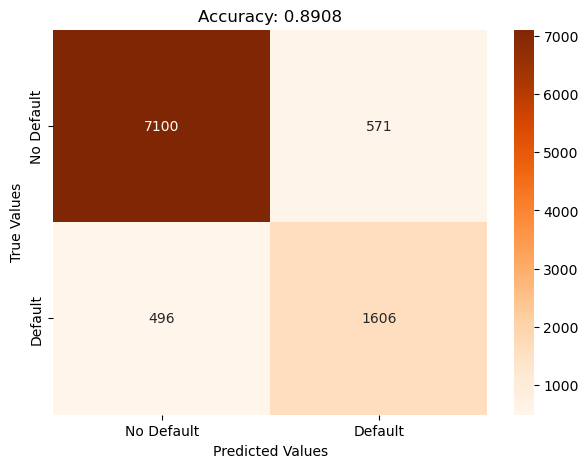



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7671
           1       0.74      0.76      0.75      2102

    accuracy                           0.89      9773
   macro avg       0.84      0.84      0.84      9773
weighted avg       0.89      0.89      0.89      9773



In [94]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **1.0000**.
+ Score của tập Test là **0.8908**.
+ Nhìn chung, mức độ chênh lệch của 2 score giữa 2 tập data khoảng 11%. Do đó, model có thể bị overfitting.

### 4.5 Random Forest <a class="anchor" id="4.5"></a>

**Training the Random Forest Classification model on the Training set**

In [95]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
acc5 = accuracy_score(y_test, y_pred)

In [96]:
# Train Score
train_score = RF_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9893


**Testing the Random Forest Classification model on the Testing set**

In [97]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.7022
Precision score: 0.9566
F1-Score: 0.8099
Accuracy score: 0.9291


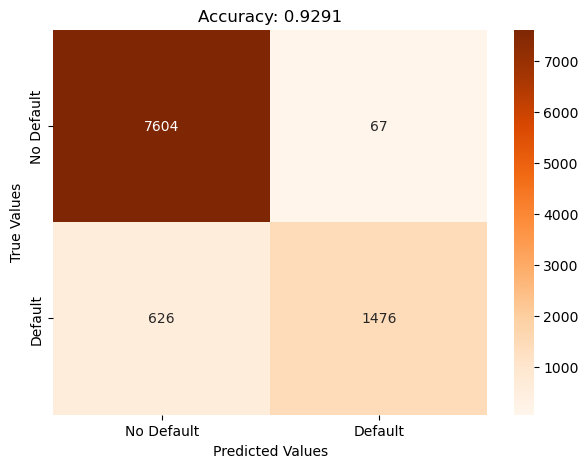



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7671
           1       0.96      0.70      0.81      2102

    accuracy                           0.93      9773
   macro avg       0.94      0.85      0.88      9773
weighted avg       0.93      0.93      0.92      9773



In [98]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.9893**.
+ Score của tập Test là **0.9291**.
+ Nhìn chung, mức độ chênh lệch của 2 score giữa 2 tập data khoảng 6%. Do đó, model có thể bị overfitting. Tuy nhiên, độ chính xác của Random Forest rất cao.

### 4.6 XGBoost <a class="anchor" id="4.6"></a>

**Training the XGBoost model on the Training set**

In [99]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
acc6 = accuracy_score(y_test, y_pred)

In [100]:
# Train Score
train_score = XGB_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9565


**Testing the XGBoost model on the Testing set**

In [101]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.7303
Precision score: 0.9452
F1-Score: 0.8239
Accuracy score: 0.9329


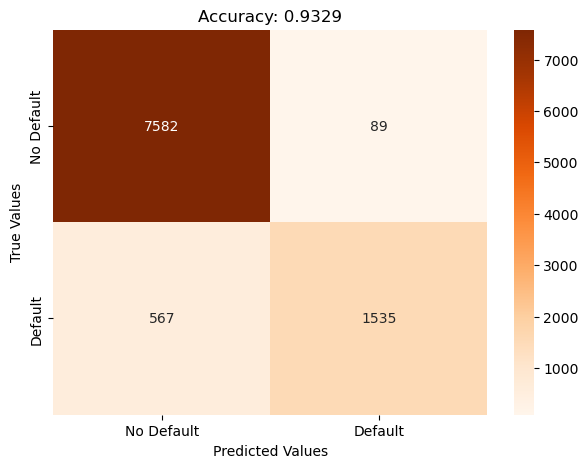



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7671
           1       0.95      0.73      0.82      2102

    accuracy                           0.93      9773
   macro avg       0.94      0.86      0.89      9773
weighted avg       0.93      0.93      0.93      9773



In [102]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.9565**.
+ Score của tập Test là **0.9329**.
+ Nhìn chung, mức độ chênh lệch của 2 score giữa 2 tập data khoảng 2%. Độ chính xác của model rất cao (**auc = 93,29%**). Do đó, model phù hợp cho phân tích.

### 4.7 CatBoost <a class="anchor" id="4.7"></a>

**Training CatBoost on the Training set**

In [103]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
acc7 = accuracy_score(y_test, y_pred)

Learning rate set to 0.039156
0:	learn: 0.6521472	total: 75.9ms	remaining: 1m 15s
1:	learn: 0.6149835	total: 81.6ms	remaining: 40.7s
2:	learn: 0.5827584	total: 85.9ms	remaining: 28.6s
3:	learn: 0.5525458	total: 90.9ms	remaining: 22.6s
4:	learn: 0.5267595	total: 95.8ms	remaining: 19.1s
5:	learn: 0.5011505	total: 101ms	remaining: 16.8s
6:	learn: 0.4815518	total: 106ms	remaining: 15s
7:	learn: 0.4648782	total: 114ms	remaining: 14.2s
8:	learn: 0.4474633	total: 119ms	remaining: 13.1s
9:	learn: 0.4327910	total: 128ms	remaining: 12.7s
10:	learn: 0.4197504	total: 133ms	remaining: 12s
11:	learn: 0.4075960	total: 139ms	remaining: 11.4s
12:	learn: 0.3961272	total: 145ms	remaining: 11s
13:	learn: 0.3869394	total: 149ms	remaining: 10.5s
14:	learn: 0.3775057	total: 154ms	remaining: 10.1s
15:	learn: 0.3681003	total: 162ms	remaining: 9.93s
16:	learn: 0.3607545	total: 166ms	remaining: 9.62s
17:	learn: 0.3536610	total: 171ms	remaining: 9.3s
18:	learn: 0.3478826	total: 180ms	remaining: 9.31s
19:	learn: 0

180:	learn: 0.2058850	total: 993ms	remaining: 4.5s
181:	learn: 0.2058302	total: 998ms	remaining: 4.48s
182:	learn: 0.2057201	total: 1s	remaining: 4.47s
183:	learn: 0.2055218	total: 1.01s	remaining: 4.46s
184:	learn: 0.2054134	total: 1.01s	remaining: 4.46s
185:	learn: 0.2053447	total: 1.01s	remaining: 4.45s
186:	learn: 0.2051731	total: 1.02s	remaining: 4.43s
187:	learn: 0.2051122	total: 1.02s	remaining: 4.43s
188:	learn: 0.2050081	total: 1.03s	remaining: 4.42s
189:	learn: 0.2048910	total: 1.03s	remaining: 4.41s
190:	learn: 0.2047355	total: 1.04s	remaining: 4.41s
191:	learn: 0.2045990	total: 1.05s	remaining: 4.41s
192:	learn: 0.2045212	total: 1.05s	remaining: 4.4s
193:	learn: 0.2044167	total: 1.05s	remaining: 4.39s
194:	learn: 0.2043601	total: 1.06s	remaining: 4.38s
195:	learn: 0.2042798	total: 1.06s	remaining: 4.37s
196:	learn: 0.2041844	total: 1.07s	remaining: 4.36s
197:	learn: 0.2040380	total: 1.07s	remaining: 4.35s
198:	learn: 0.2039666	total: 1.08s	remaining: 4.34s
199:	learn: 0.203

343:	learn: 0.1866364	total: 1.8s	remaining: 3.43s
344:	learn: 0.1866289	total: 1.8s	remaining: 3.42s
345:	learn: 0.1865187	total: 1.81s	remaining: 3.42s
346:	learn: 0.1864026	total: 1.81s	remaining: 3.41s
347:	learn: 0.1863120	total: 1.81s	remaining: 3.4s
348:	learn: 0.1862142	total: 1.82s	remaining: 3.39s
349:	learn: 0.1861561	total: 1.82s	remaining: 3.39s
350:	learn: 0.1861007	total: 1.83s	remaining: 3.38s
351:	learn: 0.1860281	total: 1.83s	remaining: 3.37s
352:	learn: 0.1859443	total: 1.84s	remaining: 3.37s
353:	learn: 0.1858790	total: 1.84s	remaining: 3.36s
354:	learn: 0.1857714	total: 1.85s	remaining: 3.36s
355:	learn: 0.1857112	total: 1.85s	remaining: 3.35s
356:	learn: 0.1856102	total: 1.86s	remaining: 3.35s
357:	learn: 0.1854993	total: 1.87s	remaining: 3.35s
358:	learn: 0.1854300	total: 1.87s	remaining: 3.35s
359:	learn: 0.1852119	total: 1.88s	remaining: 3.35s
360:	learn: 0.1851412	total: 1.89s	remaining: 3.34s
361:	learn: 0.1850776	total: 1.89s	remaining: 3.33s
362:	learn: 0.1

502:	learn: 0.1733814	total: 2.61s	remaining: 2.58s
503:	learn: 0.1732992	total: 2.61s	remaining: 2.57s
504:	learn: 0.1732617	total: 2.62s	remaining: 2.56s
505:	learn: 0.1731999	total: 2.62s	remaining: 2.56s
506:	learn: 0.1730903	total: 2.63s	remaining: 2.55s
507:	learn: 0.1729793	total: 2.63s	remaining: 2.55s
508:	learn: 0.1728491	total: 2.63s	remaining: 2.54s
509:	learn: 0.1727853	total: 2.64s	remaining: 2.54s
510:	learn: 0.1727568	total: 2.64s	remaining: 2.53s
511:	learn: 0.1726831	total: 2.65s	remaining: 2.52s
512:	learn: 0.1726083	total: 2.65s	remaining: 2.52s
513:	learn: 0.1725528	total: 2.65s	remaining: 2.51s
514:	learn: 0.1724721	total: 2.66s	remaining: 2.51s
515:	learn: 0.1724398	total: 2.67s	remaining: 2.5s
516:	learn: 0.1723677	total: 2.67s	remaining: 2.49s
517:	learn: 0.1722471	total: 2.67s	remaining: 2.49s
518:	learn: 0.1721695	total: 2.68s	remaining: 2.48s
519:	learn: 0.1721286	total: 2.68s	remaining: 2.48s
520:	learn: 0.1720563	total: 2.69s	remaining: 2.47s
521:	learn: 0

673:	learn: 0.1621337	total: 3.41s	remaining: 1.65s
674:	learn: 0.1620684	total: 3.42s	remaining: 1.65s
675:	learn: 0.1620154	total: 3.42s	remaining: 1.64s
676:	learn: 0.1619488	total: 3.43s	remaining: 1.63s
677:	learn: 0.1619127	total: 3.43s	remaining: 1.63s
678:	learn: 0.1618693	total: 3.44s	remaining: 1.62s
679:	learn: 0.1617998	total: 3.44s	remaining: 1.62s
680:	learn: 0.1617445	total: 3.44s	remaining: 1.61s
681:	learn: 0.1617037	total: 3.45s	remaining: 1.61s
682:	learn: 0.1616242	total: 3.45s	remaining: 1.6s
683:	learn: 0.1615581	total: 3.46s	remaining: 1.6s
684:	learn: 0.1614964	total: 3.46s	remaining: 1.59s
685:	learn: 0.1614650	total: 3.47s	remaining: 1.59s
686:	learn: 0.1614485	total: 3.47s	remaining: 1.58s
687:	learn: 0.1613724	total: 3.48s	remaining: 1.58s
688:	learn: 0.1613178	total: 3.48s	remaining: 1.57s
689:	learn: 0.1612609	total: 3.49s	remaining: 1.57s
690:	learn: 0.1612219	total: 3.49s	remaining: 1.56s
691:	learn: 0.1610790	total: 3.5s	remaining: 1.56s
692:	learn: 0.1

843:	learn: 0.1527612	total: 4.22s	remaining: 780ms
844:	learn: 0.1527176	total: 4.22s	remaining: 775ms
845:	learn: 0.1526218	total: 4.23s	remaining: 770ms
846:	learn: 0.1525786	total: 4.23s	remaining: 765ms
847:	learn: 0.1525084	total: 4.24s	remaining: 760ms
848:	learn: 0.1524639	total: 4.24s	remaining: 755ms
849:	learn: 0.1524022	total: 4.25s	remaining: 750ms
850:	learn: 0.1523659	total: 4.25s	remaining: 745ms
851:	learn: 0.1523184	total: 4.26s	remaining: 740ms
852:	learn: 0.1522727	total: 4.26s	remaining: 735ms
853:	learn: 0.1522468	total: 4.27s	remaining: 730ms
854:	learn: 0.1522134	total: 4.27s	remaining: 725ms
855:	learn: 0.1521673	total: 4.28s	remaining: 720ms
856:	learn: 0.1520960	total: 4.28s	remaining: 715ms
857:	learn: 0.1520480	total: 4.29s	remaining: 710ms
858:	learn: 0.1520203	total: 4.29s	remaining: 704ms
859:	learn: 0.1519780	total: 4.3s	remaining: 699ms
860:	learn: 0.1519178	total: 4.3s	remaining: 695ms
861:	learn: 0.1518753	total: 4.31s	remaining: 690ms
862:	learn: 0.

In [104]:
# Train Score
train_score = catboost_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9497


**Testing the CatBoost model on the Testing set**

In [105]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.7279
Precision score: 0.9684
F1-Score: 0.8311
Accuracy score: 0.9364


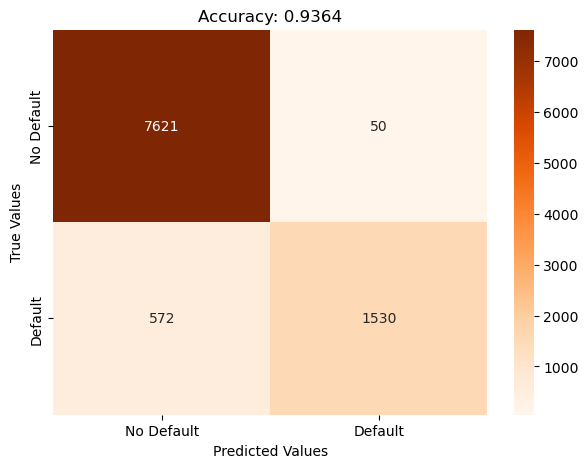



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7671
           1       0.97      0.73      0.83      2102

    accuracy                           0.94      9773
   macro avg       0.95      0.86      0.90      9773
weighted avg       0.94      0.94      0.93      9773



In [106]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.9497**.
+ Score của tập Test là **0.9364**.
+ Nhìn chung, mức độ chênh lệch của 2 score giữa 2 tập data khoảng 2%. Độ chính xác của model rất cao (**auc = 93.64%**). Do đó, model phù hợp cho phân tích.

### 4.8 ANN <a class="anchor" id="4.8"></a>

In [107]:
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2023-02-16 05:23:51.719860: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [108]:
ANN_model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ANN_model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)

2023-02-16 05:23:54.713229: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [109]:
ANN_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
713/713 [==============================] - 1s 688us/step - loss: 76.8607 - accuracy: 0.7266
Epoch 2/200
713/713 [==============================] - 0s 660us/step - loss: 16.1429 - accuracy: 0.7209
Epoch 3/200
713/713 [==============================] - 0s 657us/step - loss: 16.9624 - accuracy: 0.7281
Epoch 4/200
713/713 [==============================] - 0s 669us/step - loss: 14.8167 - accuracy: 0.7332
Epoch 5/200
713/713 [==============================] - 0s 653us/step - loss: 14.9137 - accuracy: 0.7311
Epoch 6/200
713/713 [==============================] - 0s 666us/step - loss: 15.2373 - accuracy: 0.7365
Epoch 7/200
713/713 [==============================] - 0s 671us/step - loss: 12.3249 - accuracy: 0.7424
Epoch 8/200
713/713 [==============================] - 0s 659us/step - loss: 14.5259 - accuracy: 0.7371
Epoch 9/200
713/713 [==============================] - 0s 661us/step - loss: 13.1172 - accuracy: 0.7446
Epoch 10/200
713/713 [==============================] - 0s 658us

713/713 [==============================] - 0s 665us/step - loss: 9.4410 - accuracy: 0.7896
Epoch 80/200
713/713 [==============================] - 0s 659us/step - loss: 8.7929 - accuracy: 0.7925
Epoch 81/200
713/713 [==============================] - 0s 666us/step - loss: 7.9791 - accuracy: 0.7926
Epoch 82/200
713/713 [==============================] - 0s 666us/step - loss: 6.8977 - accuracy: 0.7995
Epoch 83/200
713/713 [==============================] - 0s 677us/step - loss: 8.7791 - accuracy: 0.7875
Epoch 84/200
713/713 [==============================] - 0s 698us/step - loss: 9.5210 - accuracy: 0.7906
Epoch 85/200
713/713 [==============================] - 0s 697us/step - loss: 6.7031 - accuracy: 0.7981
Epoch 86/200
713/713 [==============================] - 0s 680us/step - loss: 8.8103 - accuracy: 0.7870
Epoch 87/200
713/713 [==============================] - 0s 651us/step - loss: 8.6930 - accuracy: 0.7913
Epoch 88/200
713/713 [==============================] - 0s 686us/step - loss:

713/713 [==============================] - 0s 656us/step - loss: 6.3005 - accuracy: 0.7952
Epoch 158/200
713/713 [==============================] - 0s 643us/step - loss: 5.5938 - accuracy: 0.8051
Epoch 159/200
713/713 [==============================] - 0s 646us/step - loss: 5.7364 - accuracy: 0.7982
Epoch 160/200
713/713 [==============================] - 0s 659us/step - loss: 5.7520 - accuracy: 0.7975
Epoch 161/200
713/713 [==============================] - 0s 650us/step - loss: 6.4126 - accuracy: 0.7941
Epoch 162/200
713/713 [==============================] - 0s 645us/step - loss: 6.0253 - accuracy: 0.7912
Epoch 163/200
713/713 [==============================] - 0s 649us/step - loss: 5.2143 - accuracy: 0.7984
Epoch 164/200
713/713 [==============================] - 0s 645us/step - loss: 5.3377 - accuracy: 0.8022
Epoch 165/200
713/713 [==============================] - 0s 656us/step - loss: 6.2309 - accuracy: 0.7974
Epoch 166/200
713/713 [==============================] - 0s 641us/ste

In [110]:
def predict(model,x):
    pred  = ANN_model.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def predict_graph(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,5))
#     cmap = sns.color_palette("viridis", as_cmap=True)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['No Default','Default'], yticklabels=['No Default','Default'])
    plt.title(title)
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

**Train Predictions**

713/713 [==============================] - 0s 407us/step


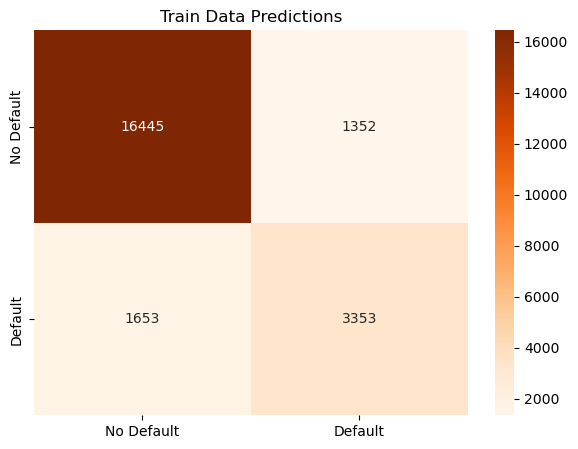



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     17797
           1       0.71      0.67      0.69      5006

    accuracy                           0.87     22803
   macro avg       0.81      0.80      0.80     22803
weighted avg       0.87      0.87      0.87     22803



In [111]:
y_train_pred = predict(ANN_model, X_train)
predict_graph(y_train, y_train_pred, 'Train Data Predictions')

**Test Predictions**

In [112]:
y_pred = predict(ANN_model, X_test)
acc8 = accuracy_score(y_test, y_pred)

306/306 [==============================] - 0s 410us/step


In [113]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.6789
Precision score: 0.7002
F1-Score: 0.6894
Accuracy score: 0.8684


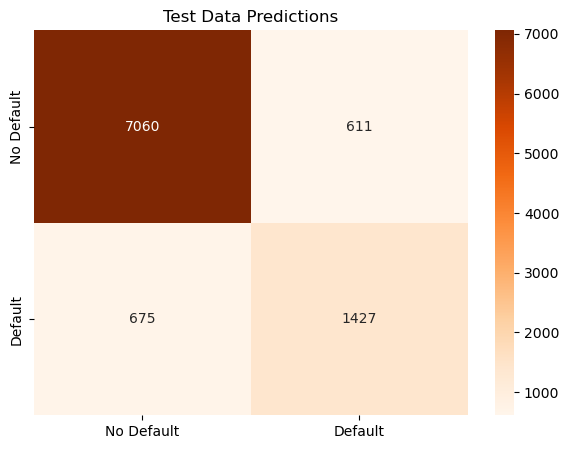



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      7671
           1       0.70      0.68      0.69      2102

    accuracy                           0.87      9773
   macro avg       0.81      0.80      0.80      9773
weighted avg       0.87      0.87      0.87      9773



In [114]:
predict_graph(y_test, y_pred, 'Test Data Predictions')

**Nhận xét:**
+ Score của tập Train là **0.86**.
+ Score của tập Test là **0.86**.
+ Do đó, model phù hợp cho phân tích. Nhưng độ chính xác không cao.

<a class="anchor" id="5"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">5. RESULT</p>

[**Table of Contents**](#0.1)

### Compare the accuracy of the models on the training set

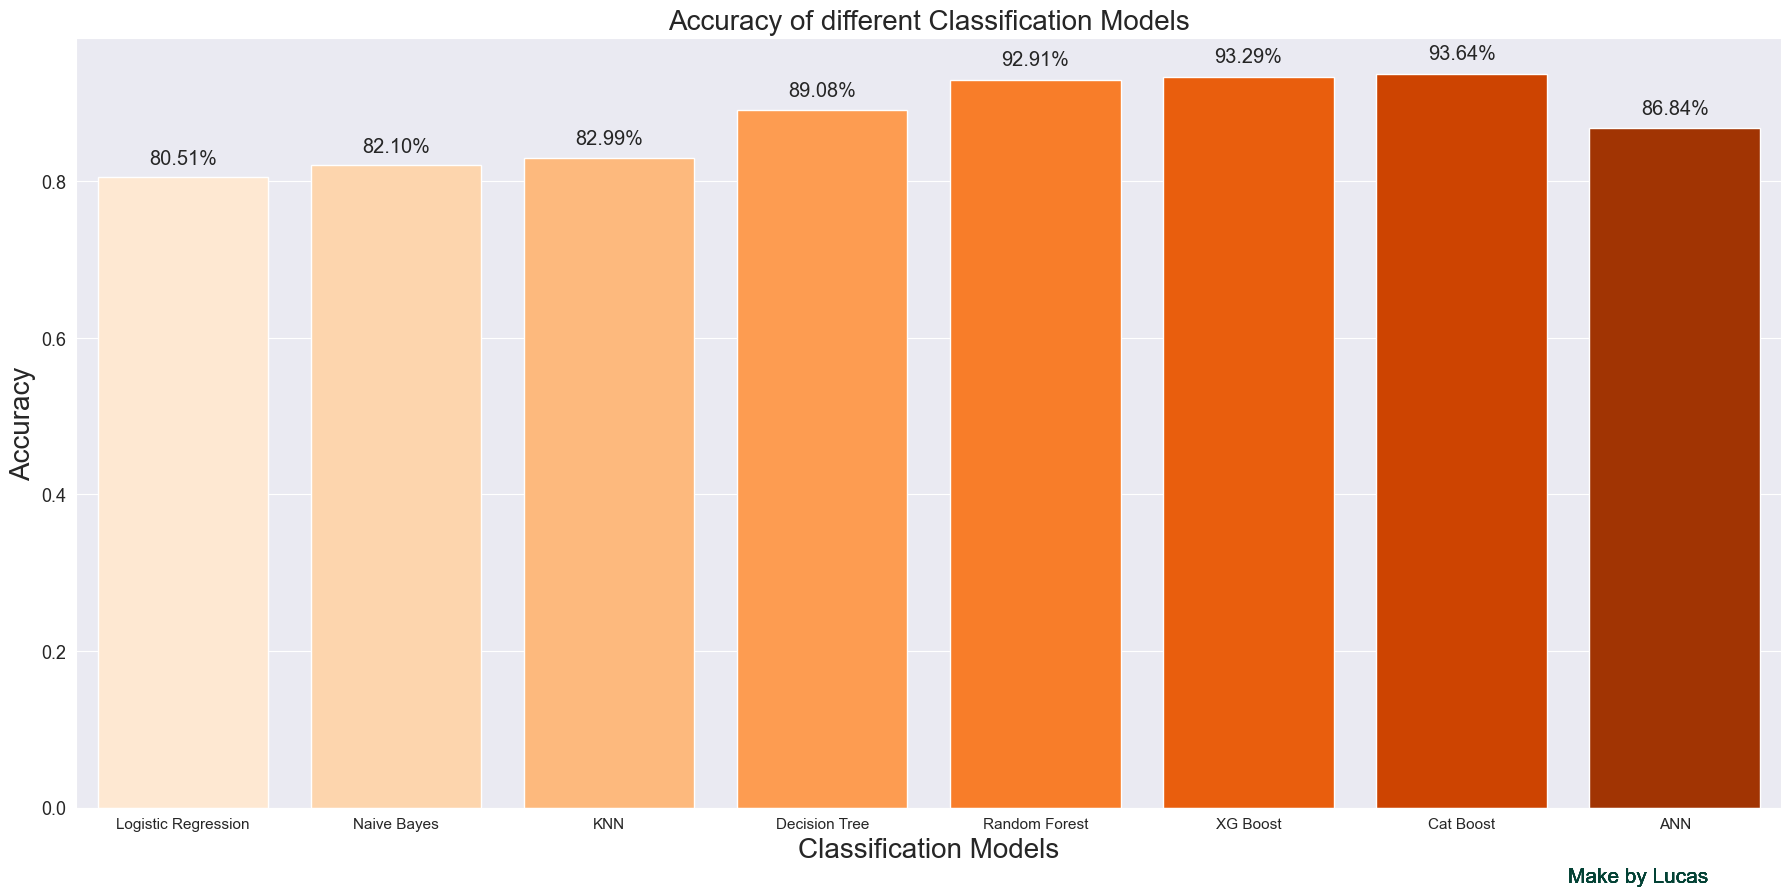

In [115]:
mylist=[]
mylist2=[]

mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("Naive Bayes")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Decision Tree")
mylist.append(acc5)
mylist2.append("Random Forest")
mylist.append(acc6)
mylist2.append("XG Boost")
mylist.append(acc7)
mylist2.append("Cat Boost")
mylist.append(acc8)
mylist2.append("ANN")

plt.figure(figsize=(22, 10))
sns.set_style("darkgrid")
ax = sns.barplot(x = mylist2, y = mylist, palette = "Oranges", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

    # Add Text watermark
    plt.text(6.5, -0.1, 'Make by Lucas', fontsize = 15,
             color ='#034235', ha ='left', va ='bottom',
             alpha = 0.7)
       
plt.show();

**Nhận xét:**
+ Top 3 model có dộ chính xác (Accuracy) cao nhất là Random Forest, XG Boost và Cat Boost.
+ Trong đó, mô hình có Accuracy **cao nhất** là **Cat Boost** (với **auc = 93.64%**).
+ Do đó, trong project này, model phù hợp nhất cho dự báo **Credit Risk** là **Cat Boost**.

### ROC Curve and Area Under the Curve

In [116]:
from sklearn.metrics import roc_curve, auc

**ROC - Logistic Regression**

In [117]:
y_pred_logistic = LR_model.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

**ROC - Naive Bayes**

In [118]:
y_pred_nb = NB_model.predict_proba(X_test)[:,1]
nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_nb = auc(nb_fpr, nb_tpr)

**ROC - KNN**

In [119]:
y_pred_knn = KNN_model.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

**ROC - Decision Tree**

In [120]:
y_pred_dtr = DTR_model.predict_proba(X_test)[:,1]
dtr_fpr, dtr_tpr, threshold = roc_curve(y_test, y_pred_dtr)
auc_dtr = auc(dtr_fpr, dtr_tpr)

**ROC - Random Forest**

In [121]:
y_pred_rfc = RF_model.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

**ROC - XG Boost**

In [122]:
y_pred_xgb = XGB_model.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

**ROC - CatBoost**

In [123]:
y_pred_catboost = catboost_model.predict_proba(X_test)[:,1]
catboost_fpr, catboost_tpr, threshold = roc_curve(y_test, y_pred_catboost)
auc_catboost = auc(catboost_fpr, catboost_tpr)

**ROC - ANN**

In [124]:
y_pred_ann = ANN_model.predict(X_test)
ann_fpr, ann_tpr, threshold = roc_curve(y_test, y_pred_ann)
auc_ann = auc(ann_fpr, ann_tpr)

306/306 [==============================] - 0s 452us/step


**ROC - Plotting Graph**

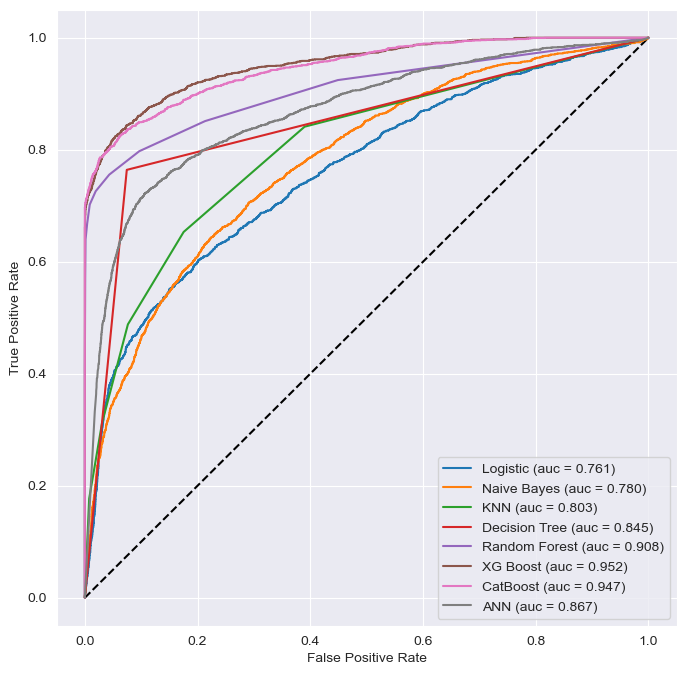

In [125]:
plt.figure(figsize=(8, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.3f)' % auc_logistic)
# Naive Bayes
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (auc = %0.3f)' % auc_nb)
# KNN
plt.plot(knn_fpr, knn_tpr, label='KNN (auc = %0.3f)' % auc_knn)
# Decision Tree
plt.plot(dtr_fpr, dtr_tpr, label='Decision Tree (auc = %0.3f)' % auc_dtr)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.3f)' % auc_rfc)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.3f)' % auc_xgb)
# CatBoost
plt.plot(catboost_fpr, catboost_tpr, linestyle='-', label='CatBoost (auc = %0.3f)' % auc_catboost)
# ANN
plt.plot(ann_fpr, ann_tpr, label='ANN (auc = %0.3f)' % auc_ann)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

**Nhận xét:** ROC của CatBoost rất cao (**auc = 94.7%**).

### Probability Threshold

In [126]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [127]:
def Threshold_PrecisionRecall(y, y_prob):
    # calucate roc curves
    precision, recall, threshold = precision_recall_curve(y, y_prob)
    scores = (2*precision*recall)/(precision+recall)
    pos = np.argmax(scores)
    return threshold[pos], scores[pos]

In [128]:
# Điều chỉnh ngưỡng
Threshold_PrecisionRecall(y_test, XGB_model.predict_proba(X_test)[:,1])

(0.372442, 0.8303045815203483)

In [129]:
def Threshold_ROC(y, y_prob):
    # caculate roc curves
    fpr, tpr, threshold = roc_curve(y, y_prob)
    scores = tpr-fpr
    pos = np.argmax(scores)
    return threshold[pos], scores[pos]

In [130]:
Threshold_ROC(y_test, XGB_model.predict_proba(X_test)[:,1])

(0.20604879, 0.7700044441847973)

**Nhận xét:** Threshold tối ưu là **0.372**.

<a class="anchor" id="6"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">6. CONCLUSIONS</p>

[**Table of Contents**](#0.1)

Trong **Project** này, một số kết quả quan trọng được tìm thấy như sau:
+ Đề tài sử dụng các mô hình Machine Learning để đưa ra mô hình tốt nhất cho dự đoán rủi ro tín dụng (**Credit Risk**).
+ Mô hình tốt nhất đưa ra là **CatBoost**.
+ Độ chính xác của mô hình xây dựng được là **93.64%**.
+ ROC của CatBoost model rất cao (**auc = 94.7%**)
+ Ngoài ra, XGBoost cũng là một mô hình cho ra dự đoán tốt, không thua kém so với CatBoost trong Project này.

Tóm lại, việc xây dựng mô hình để dự đoán rủi ro tín dụng là rất quan trọng đối với ngân hàng hay tổ chức tín dụng. Do đó, khi thực hiện dự đoán rủi ro tín dụng, cần lựa chọn một phương pháp phù hợp để có thể cung cấp thông tin phù hợp cho mục đích dự báo, đòi hỏi phải hiểu cặn kẽ về cách sử dụng phù hợp của từng phương pháp.

**<span style="color:#034235;"> Thanks for reading this post. </span>**

_______
_Make by_**<span style="color:#034235;"> Lucas,</span>**
### <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">END</p>
______
<img src="https://github.com/LeHongNgoc3820/Lucas_viet_Blog/blob/b5e2de5a812292889e793b719572d06f3ababf2d/Logo%20ta%CC%81ch%20ne%CC%82%CC%80n.png?raw=true"
     style="width:200px;height:200px;">

**<span style="color:#034235;"> You can contact with me on:</span>**
+ **Gmail**: lehongngoc.work@gmail.com
+ **GitHub**: [LeHongNgoc3820](https://github.com/LeHongNgoc3820)
+ **Linkedln**: [Ngoc Le Hong](https://www.linkedin.com/in/ngoc-le-hong-44131b21a/)